# Exploratory data analysis

#### More resources for understanding data visualization
- https://builtin.com/data-science/boxplot
- https://www.reddit.com/r/dataisbeautiful/
- https://mode.com/blog/violin-plot-examples/
- https://www.knowledgehut.com/blog/data-science/data-visualization-in-data-science
- https://www.analyticssteps.com/blogs/data-visualization-techniques

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://reach2020.eu/wp-content/uploads/2019/05/REACH-data-analytics-sophistication.png")

## Step1: fruits data
#### 1.1) Load library and data

In [3]:
# Include neccesary library
import pandas as pd
import matplotlib.pyplot as plt

# make the plot appear without explicitly show()
%matplotlib inline

In [4]:
fruits = pd.read_csv('http://msds.science.swu.ac.th/csv/fruit_data.csv ')
fruits.head()

,Area,Perimeter,Length,Width,Bounding Box,Eccentricity,Roundness,Convexity,Average Color Red,Average Color Green,Average Color Blue,Target
0,7293,322.350288,102.772555,90.655051,9100,1.133666,0.641405,1.172637,178.950413,102.710744,65.719008,Apple
1,6916,310.249783,99.093942,89.173834,8633,1.111245,0.641755,1.186141,177.669421,104.322314,61.289256,Apple
2,7057,316.007143,101.747826,88.561243,8900,1.148898,0.633996,1.183518,178.628099,106.057851,61.933884,Apple
3,6897,313.735065,99.056651,88.982012,8633,1.113221,0.639992,1.172964,178.851240,107.793388,62.743802,Apple
4,6883,309.421356,98.948844,88.909916,8633,1.112911,0.638693,1.189317,179.628099,109.760331,64.462810,Apple


#### 1.2) Explore data

In [5]:
# data dimension
fruits.shape

(80, 12)

In [6]:
# show the name of data columns (they are candidates for the model's features)
fruits.columns

Index(['Area', 'Perimeter', 'Length', 'Width', 'Bounding Box', 'Eccentricity',
       'Roundness', 'Convexity', 'Average Color Red', 'Average Color Green',
       'Average Color Blue', 'Target'],
      dtype='object')

In [7]:
# check if any feature has null or empty value
fruits.isnull().sum()

Area                   0
Perimeter              0
Length                 0
Width                  0
Bounding Box           0
Eccentricity           0
Roundness              0
Convexity              0
Average Color Red      0
Average Color Green    0
Average Color Blue     0
Target                 0
dtype: int64

In [8]:
# Data stat
fruits.describe()

,Area,Perimeter,Length,Width,Bounding Box,Eccentricity,Roundness,Convexity,Average Color Red,Average Color Green,Average Color Blue
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,6274.46250,312.445633,101.136797,82.003298,8547.337500,1.272982,0.580589,1.173267,166.620455,130.669008,73.239669
std,1433.14043,14.467298,4.347729,13.551783,897.119327,0.253911,0.101963,0.018514,44.815759,38.577439,59.671417
min,3445.00000,276.007143,93.877625,53.408523,6300.000000,1.036767,0.368820,1.105078,84.041322,100.504132,17.834711
25%,5915.50000,303.178716,99.001695,78.172658,8175.000000,1.099497,0.574367,1.168206,151.415289,102.710744,27.995868
50%,6652.50000,309.300036,100.846689,84.732940,8376.000000,1.174686,0.634364,1.180198,180.157025,122.628099,65.702479
75%,7367.75000,326.967298,102.413086,91.990114,9528.000000,1.292117,0.644497,1.184057,190.506198,133.733471,89.654959
max,7861.00000,345.462987,119.525558,97.574934,9800.000000,1.863729,0.653344,1.196027,252.231405,252.008264,250.264463


In [9]:
#fruits.groupby(['Target']).size()

In [10]:
# Count number of samples for each target
fruits.Target.value_counts()

Target
Apple     20
Banana    20
Mango     20
Orange    20
Name: count, dtype: int64

#### 1.2: First visualization of data

In [11]:
# load seaborn library
import seaborn as sns

In [12]:
# create columns name as list and remove target column from the list
allcols = list(fruits.columns)
features = allcols[0:11]
print(features)

['Area', 'Perimeter', 'Length', 'Width', 'Bounding Box', 'Eccentricity', 'Roundness', 'Convexity', 'Average Color Red', 'Average Color Green', 'Average Color Blue']


In [13]:
fruits.columns

Index(['Area', 'Perimeter', 'Length', 'Width', 'Bounding Box', 'Eccentricity',
       'Roundness', 'Convexity', 'Average Color Red', 'Average Color Green',
       'Average Color Blue', 'Target'],
      dtype='object')

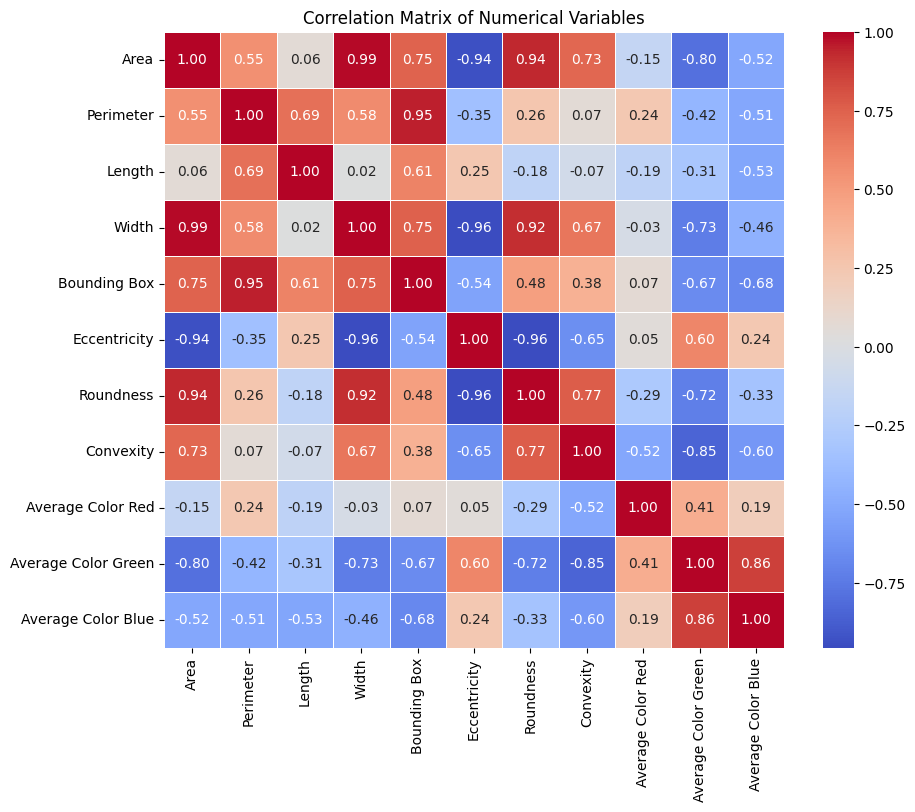

In [14]:
## Heatmap

# Select only the numerical columns for the heatmap
numerical_data = fruits.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
corr_matrix_numerical = numerical_data.corr()

# Plotting the heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Features: "Area", "Length", "Eccentricity", "Convexity", "Average Color Red", "Average Color Green", "Average Color Blue"

#### box plots are useful for
 - tell the values of outliers
 - Identify if data is symmetrical
 - Check Skewness

#### Nature of data: Qualitative: (Nominal & Ordinal) and Quantitative: (Discrete and Continuos)

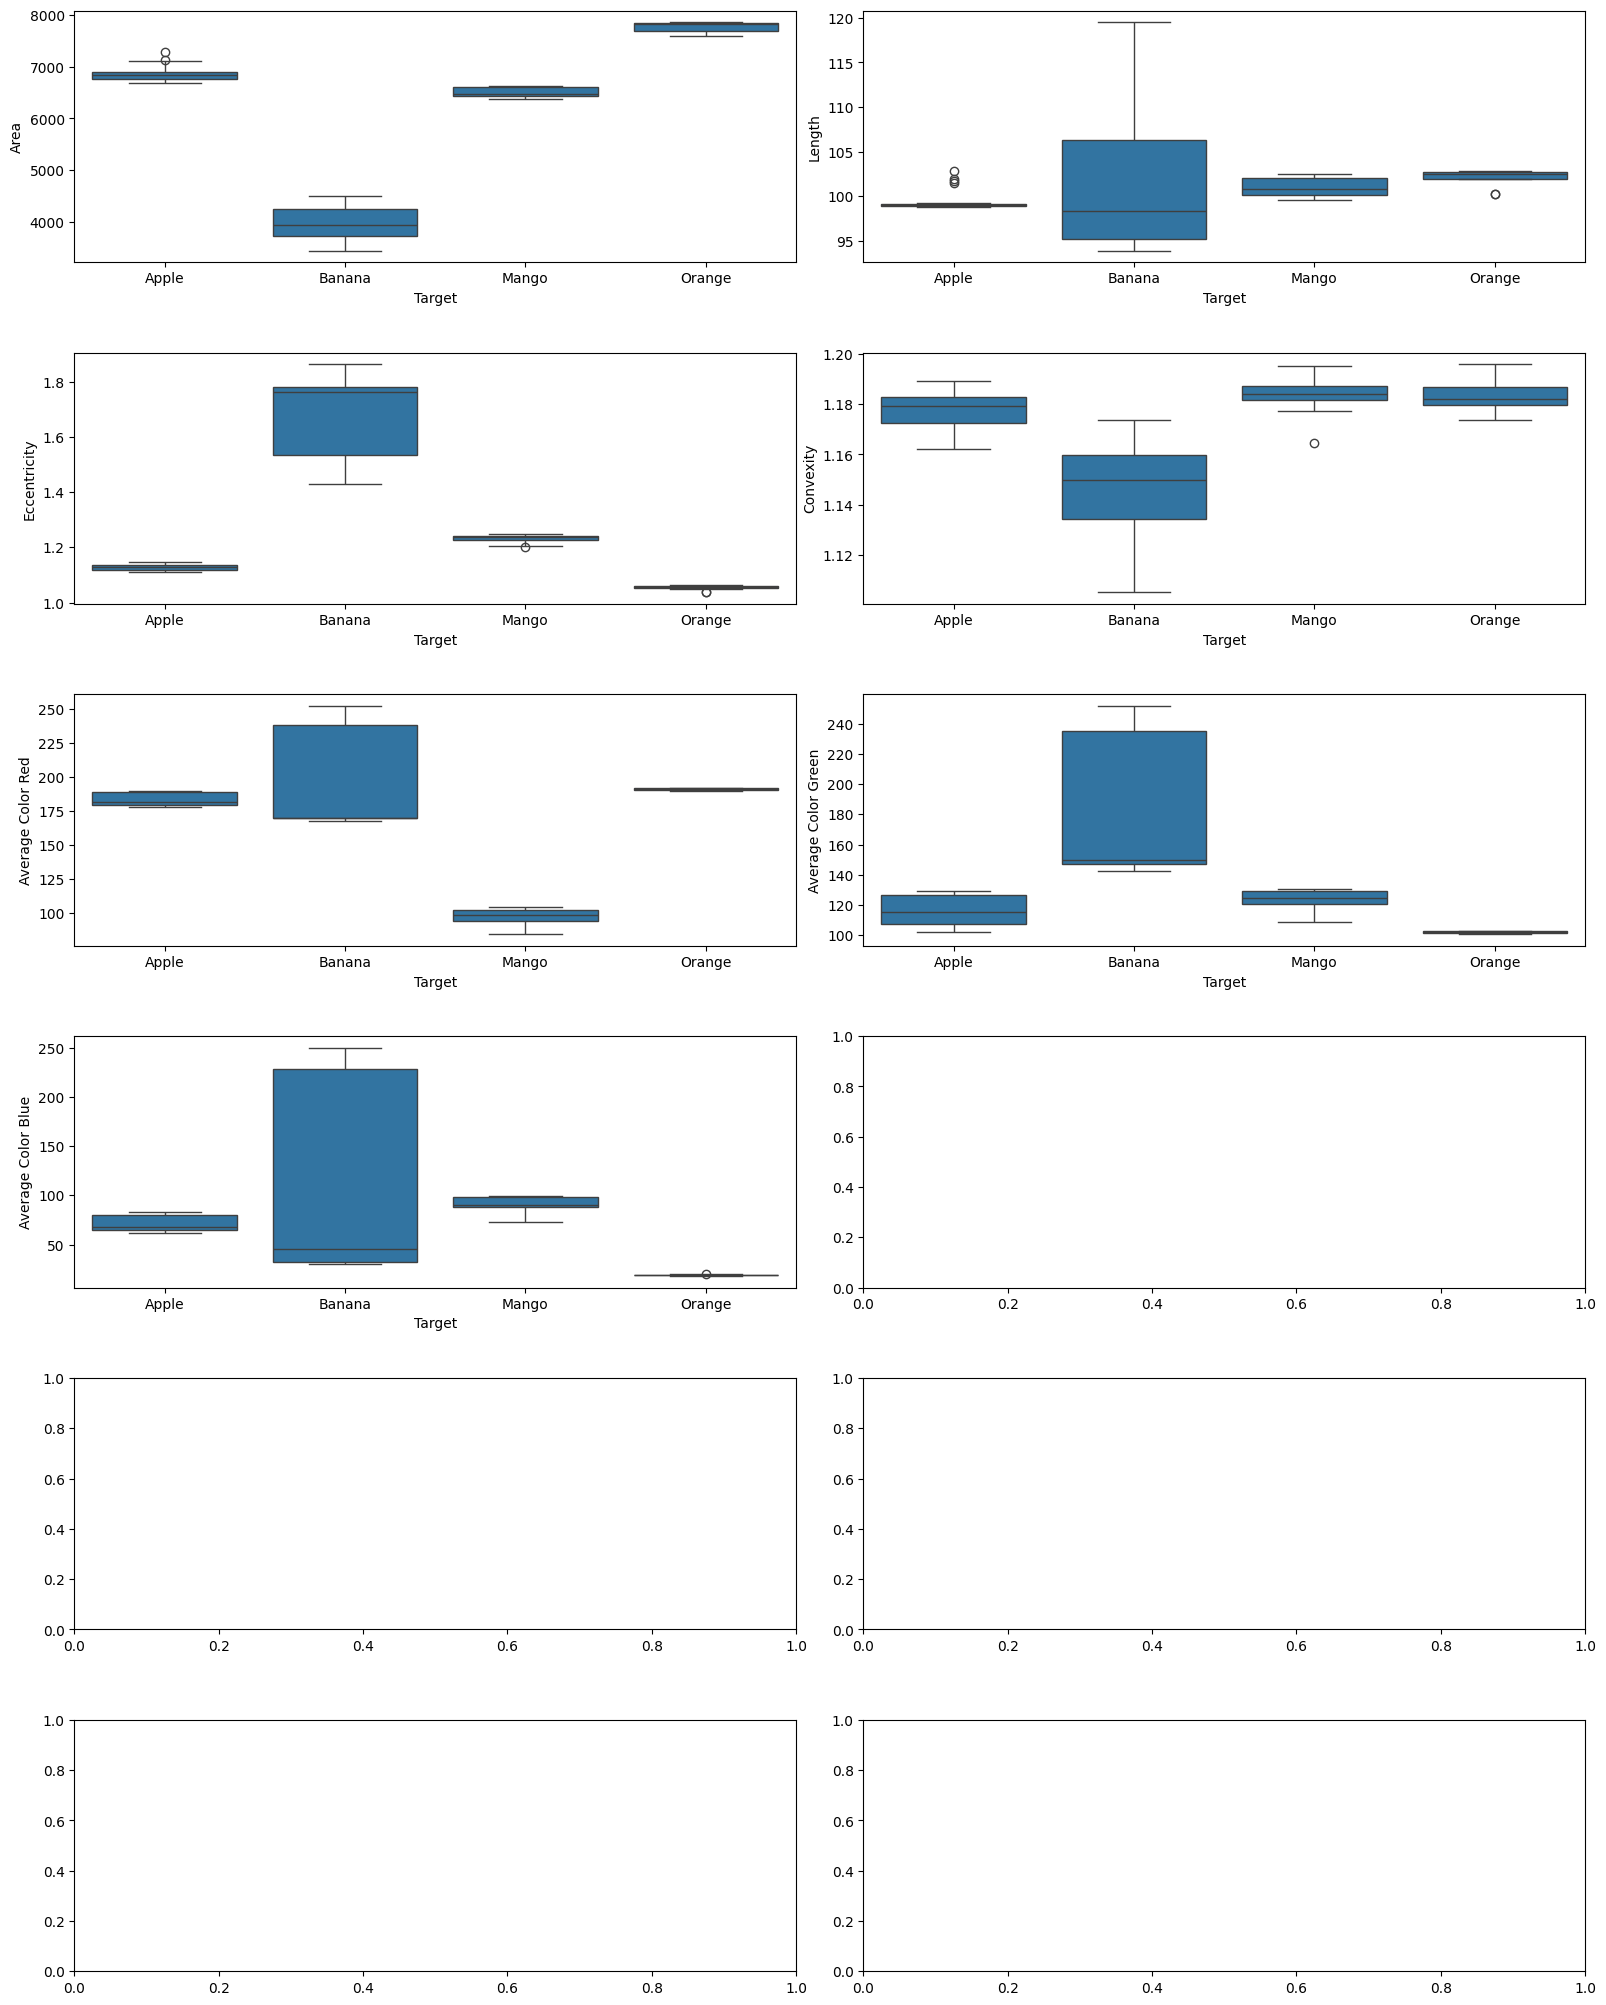

In [15]:
# plot box plot of all candidate features for each target
candidate_features = ["Area", "Length", "Eccentricity", "Convexity", "Average Color Red", "Average Color Green", "Average Color Blue"]

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(16, 20))
index = 0
axs = axs.flatten()

for i, k in enumerate(candidate_features):
    sns.boxplot(x='Target', y=k, data=fruits, ax=axs[i])
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2473474893.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fruits[k].values, bins=20, ax=axs[i])
C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2473474893.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fruits[k].values, bins=20, ax=ax

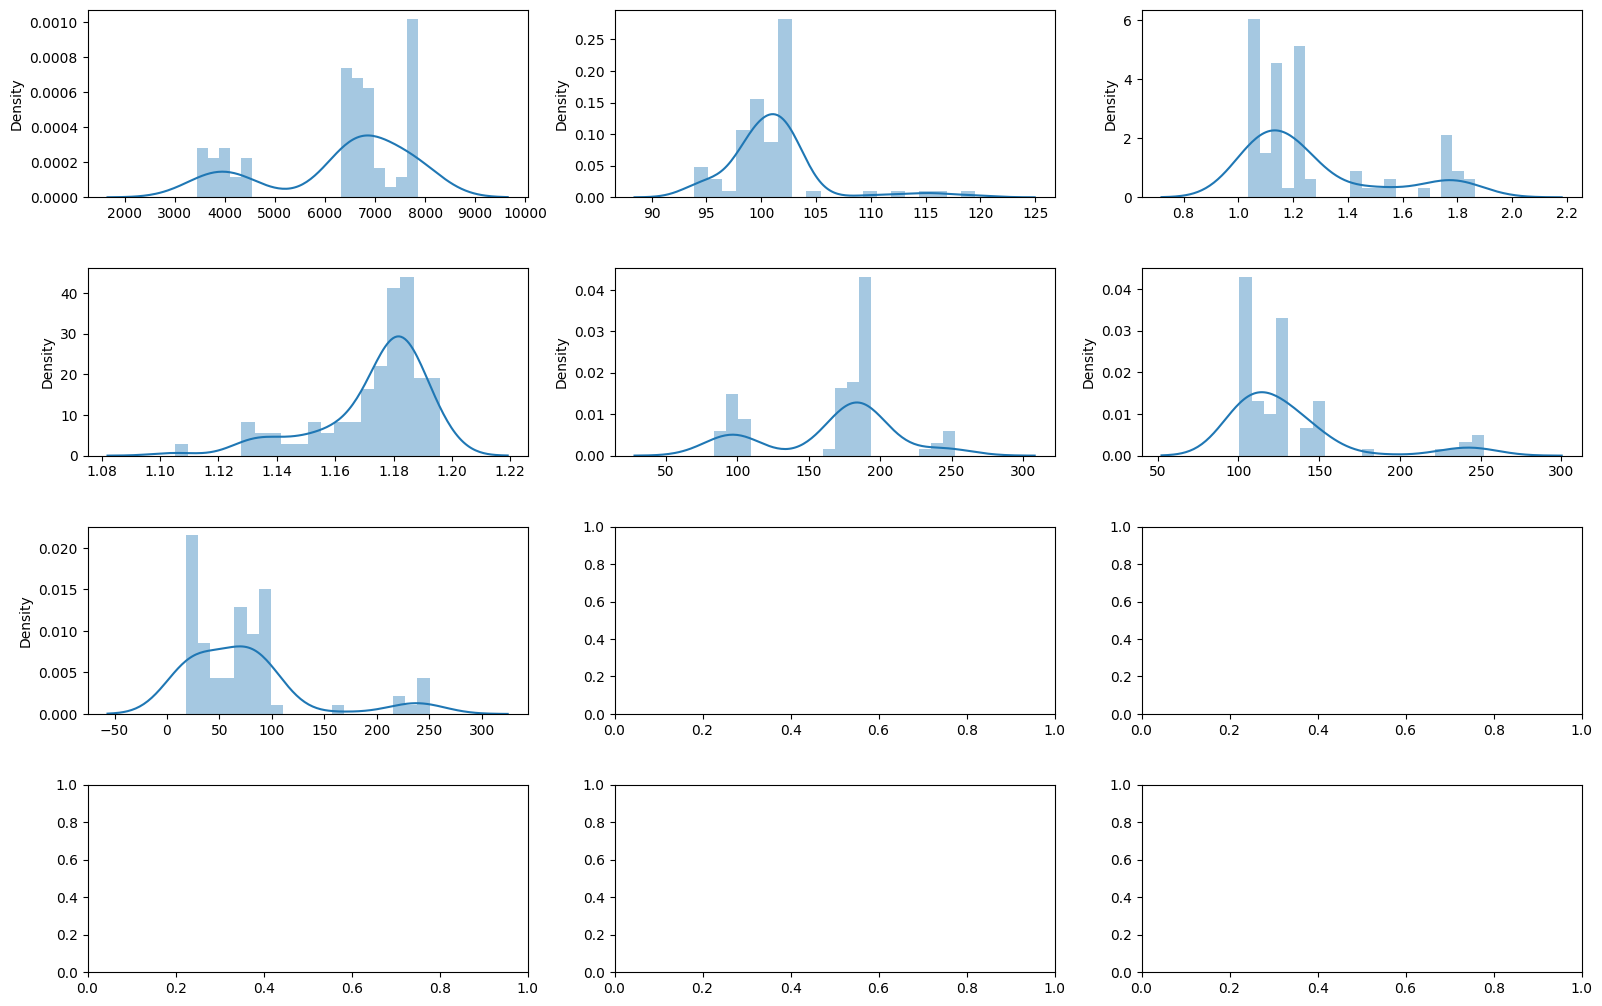

In [16]:
# plot distribution of all candidate features
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 10))
index = 0
axs = axs.flatten()

# sns.distplot(fruits[k].values, bins=20, ax=axs[index])
#for k,v in fruits.items():
for i, k in enumerate(candidate_features):
    sns.distplot(fruits[k].values, bins=20, ax=axs[i])

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

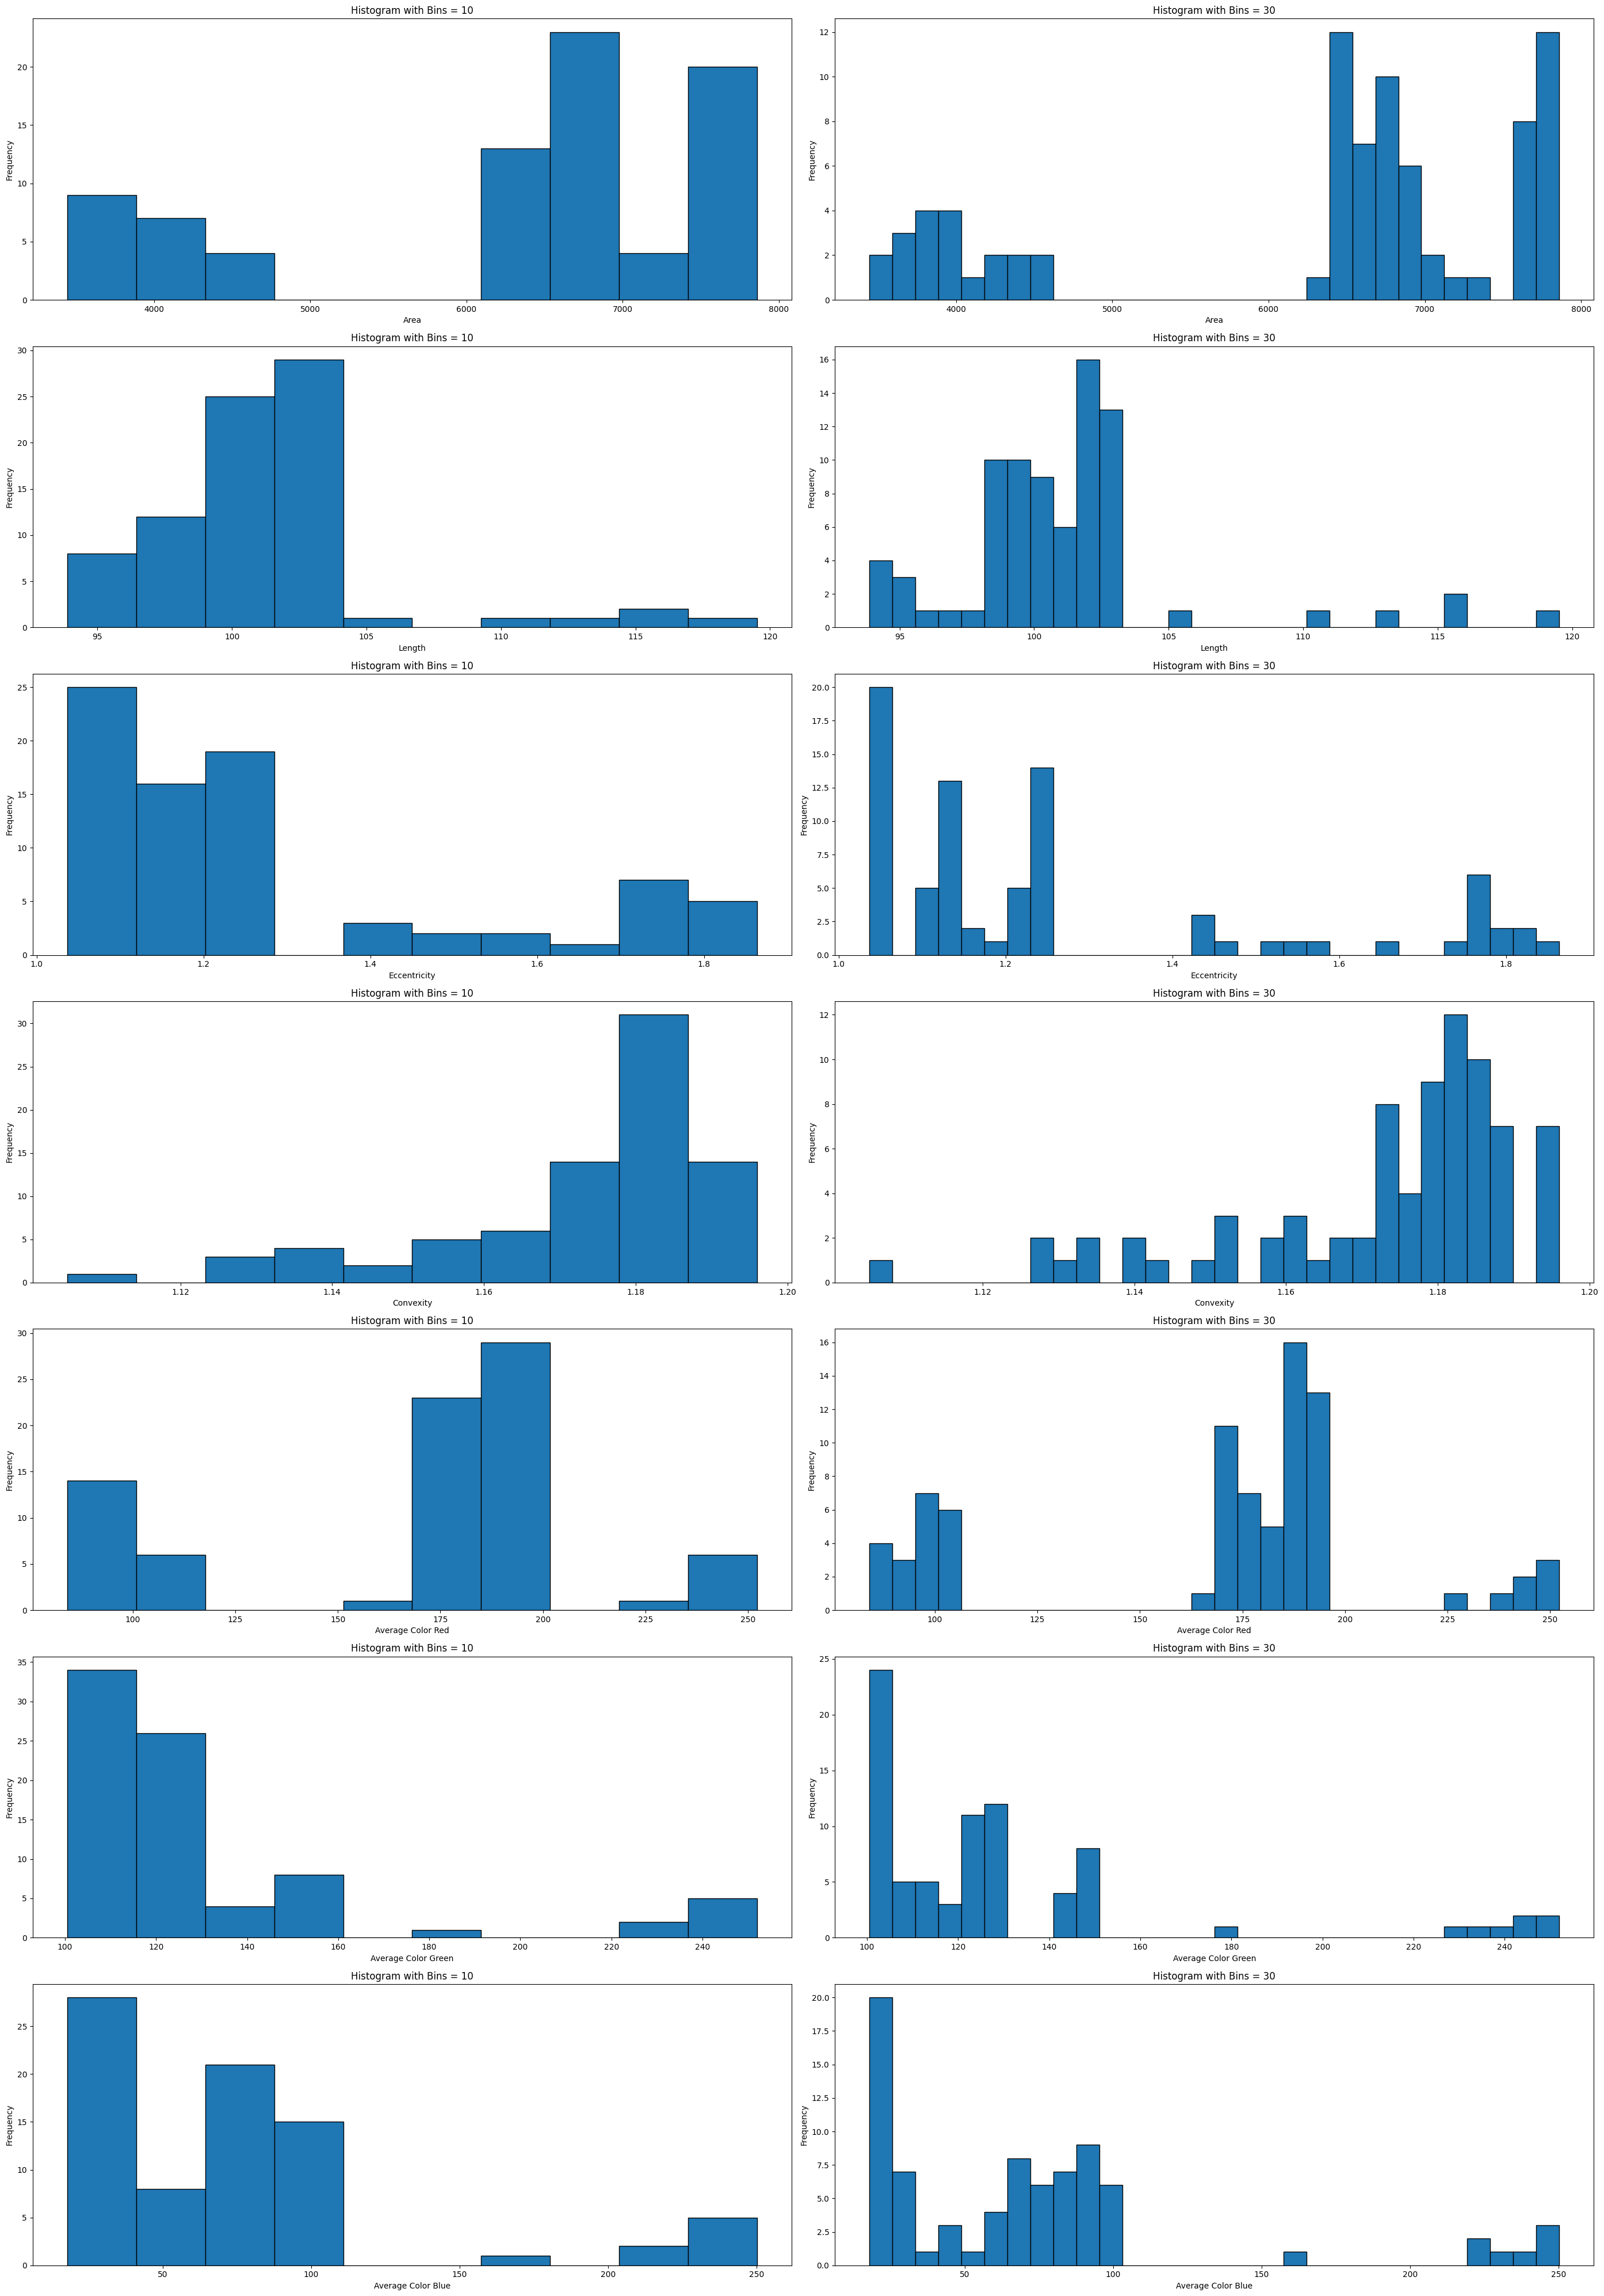

In [17]:
# exercise1 :  create histrogram with bins = 10 and 30
numerical_data = fruits.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(28, 40))

for i, k in enumerate(candidate_features):
    axs[i, 0].hist(fruits[candidate_features[i]], bins=10, edgecolor='black')
    axs[i, 0].set_title('Histogram with Bins = 10')
    axs[i, 0].set_xlabel(candidate_features[i])
    axs[i, 0].set_ylabel('Frequency')

    axs[i, 1].hist(fruits[candidate_features[i]], bins=30,edgecolor='black')
    axs[i, 1].set_title('Histogram with Bins = 30')
    axs[i, 1].set_xlabel(candidate_features[i])
    axs[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### How to select number of bins: http://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

#### violin plots combines box plots and kde

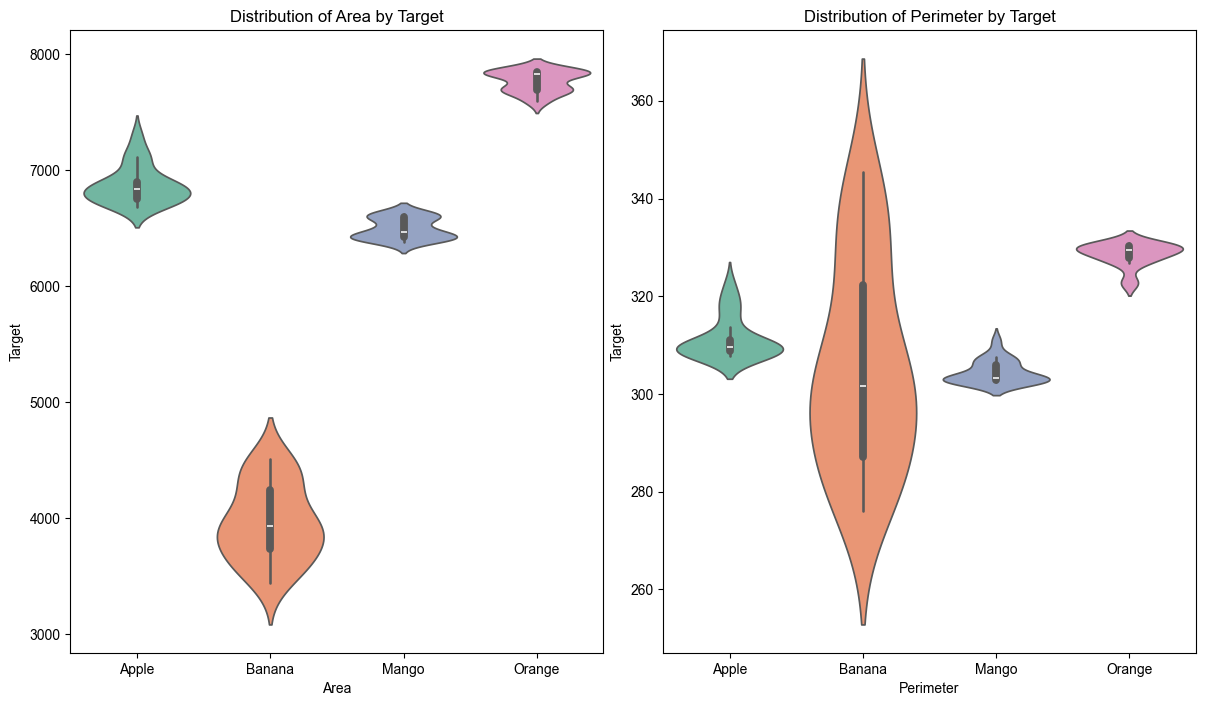

In [18]:
# plot distribution of all candidate features for each target

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 7))
index = 0
axs = axs.flatten()
sns.set_style('whitegrid')

for i, feature in enumerate(features[:2]):
    sns.violinplot(x='Target', hue='Target', data=fruits, ax=axs[i], y=feature, palette='Set2')
    axs[i].set_title(f'Distribution of {feature} by Target')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Target')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

In [19]:
sns.__version__

'0.13.2'

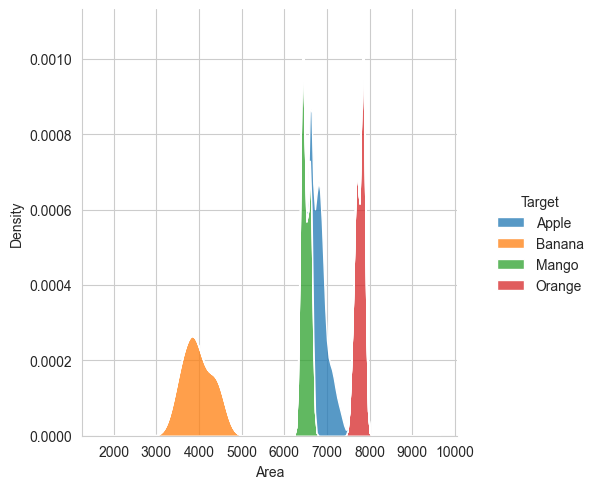

In [20]:
# see the distribution of individual feature by target value using kdeplot
sns.displot(data=fruits, x="Area", hue="Target", multiple="stack", kind="kde")

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2696945370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fruits[fruits['Target']=='Apple']['Area'], bins=20,color='r')
C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2696945370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fruits[f

<Axes: xlabel='Area', ylabel='Density'>

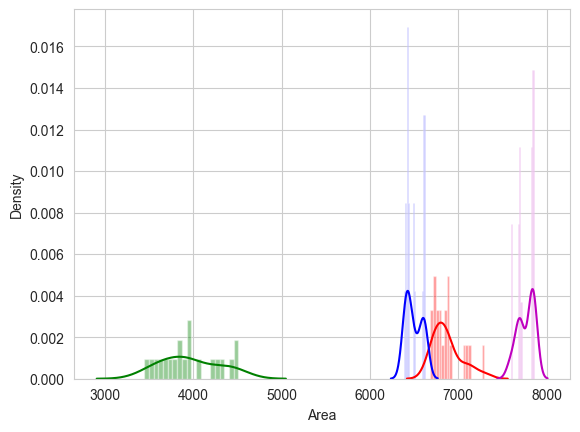

In [21]:
# depreciated after the seaborn version 0.14
sns.distplot(fruits[fruits['Target']=='Apple']['Area'], bins=20,color='r')
sns.distplot(fruits[fruits['Target']=='Banana']['Area'], bins=20,color='g')
sns.distplot(fruits[fruits['Target']=='Mango']['Area'], bins=20,color='b')
sns.distplot(fruits[fruits['Target']=='Orange']['Area'], bins=20,color='m')

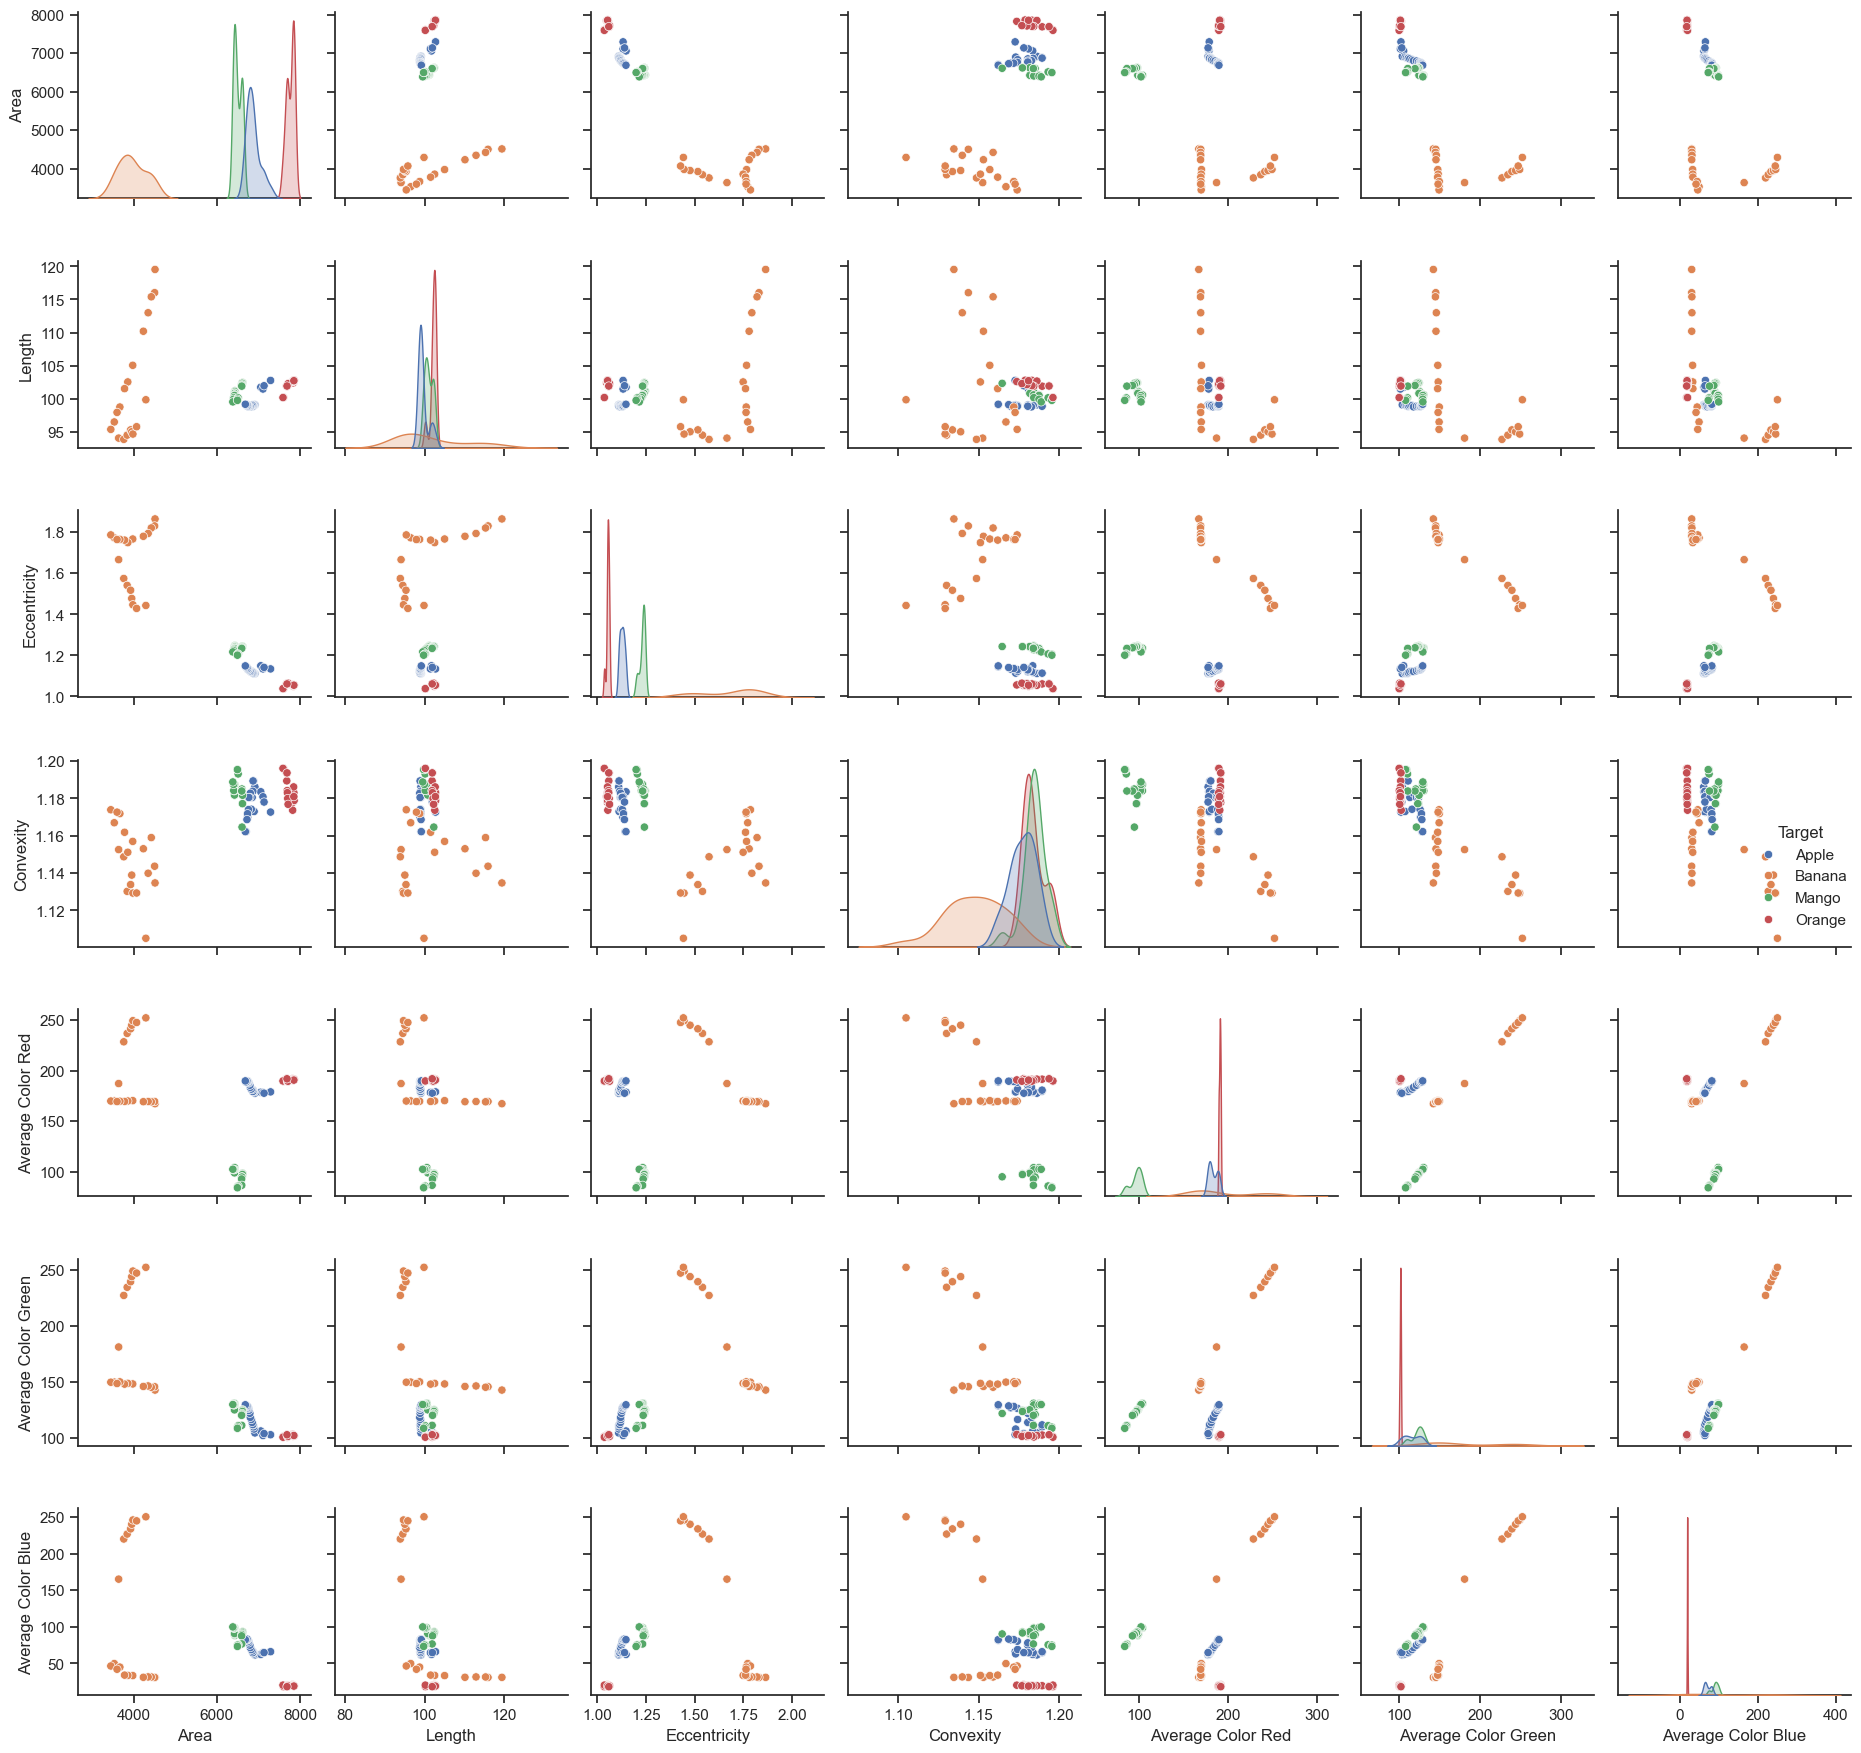

In [22]:
# # plot distribution of all candidate features for each target

# # fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(12, 7))
# index = 0
# axs = axs.flatten()
sns.set_style('whitegrid')
sns.set(style="ticks", color_codes=True)

sns.pairplot(data=fruits[candidate_features + ['Target']], hue='Target')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)


In [23]:
fruits.columns

Index(['Area', 'Perimeter', 'Length', 'Width', 'Bounding Box', 'Eccentricity',
       'Roundness', 'Convexity', 'Average Color Red', 'Average Color Green',
       'Average Color Blue', 'Target'],
      dtype='object')

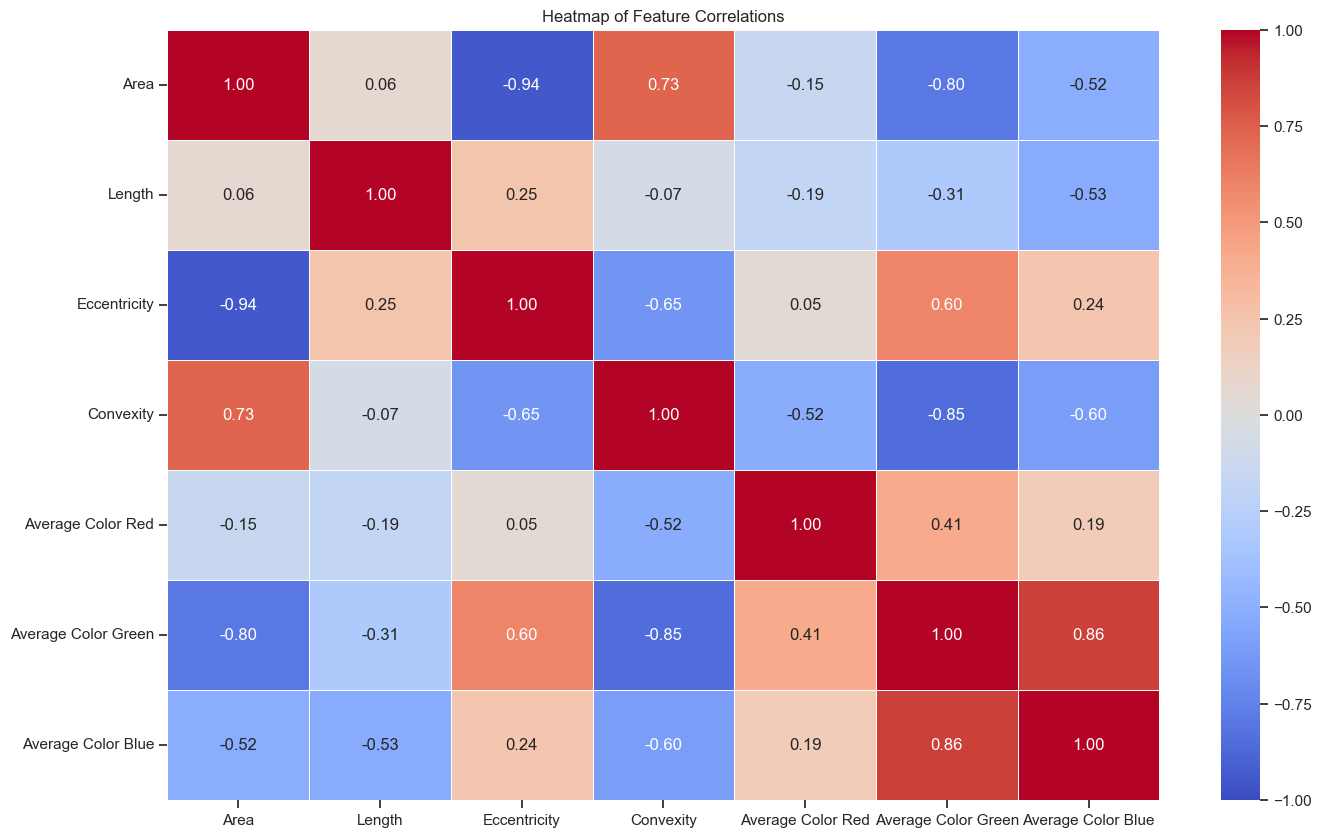

In [24]:
correlation = fruits[candidate_features].corr()

# plot the cross relationship between each pair using heatmap
plt.figure(figsize=(16, 10))

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

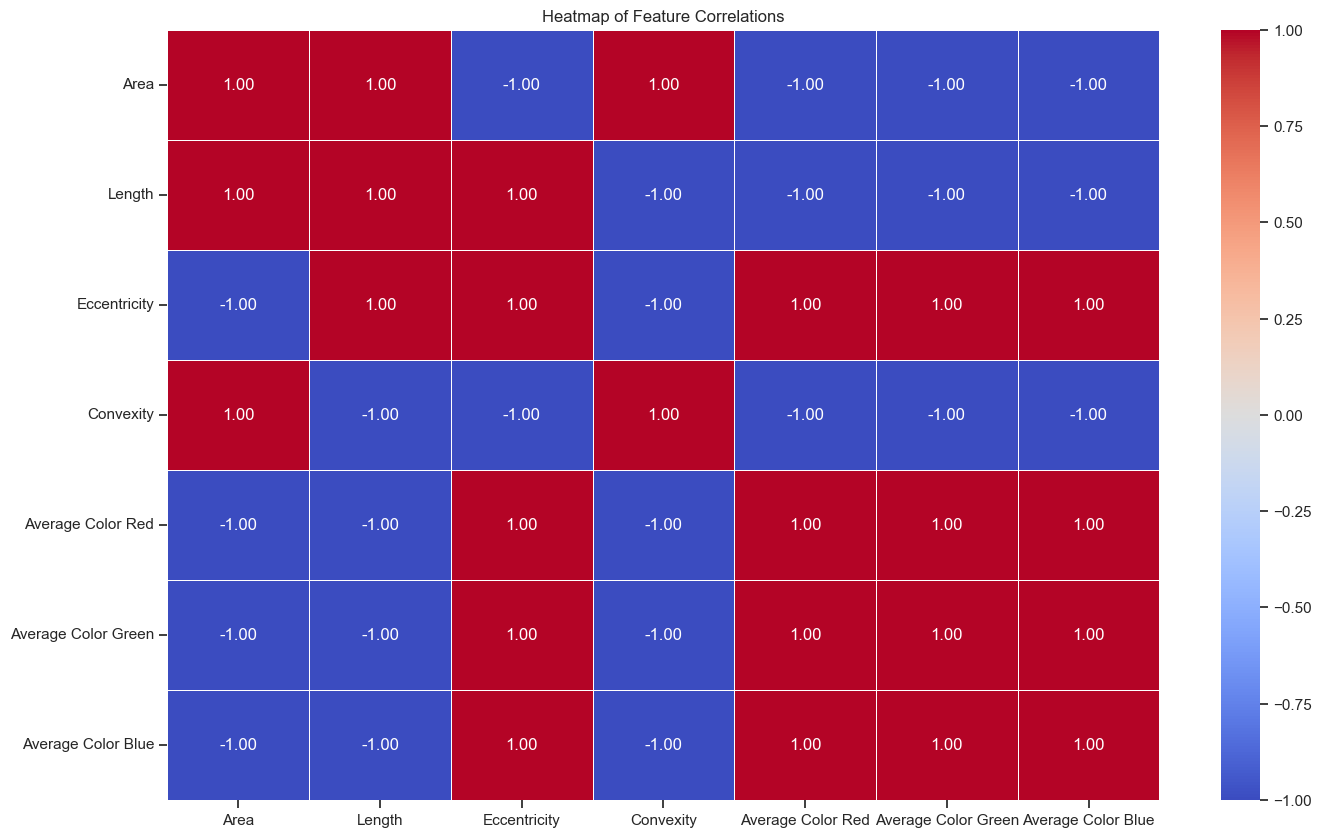

In [25]:
import numpy as np
# exercise2: find correlation with positive and negative (hint:np.sign)
plt.figure(figsize=(16, 10))

# Plot the heatmap
sns.heatmap(np.sign(correlation), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


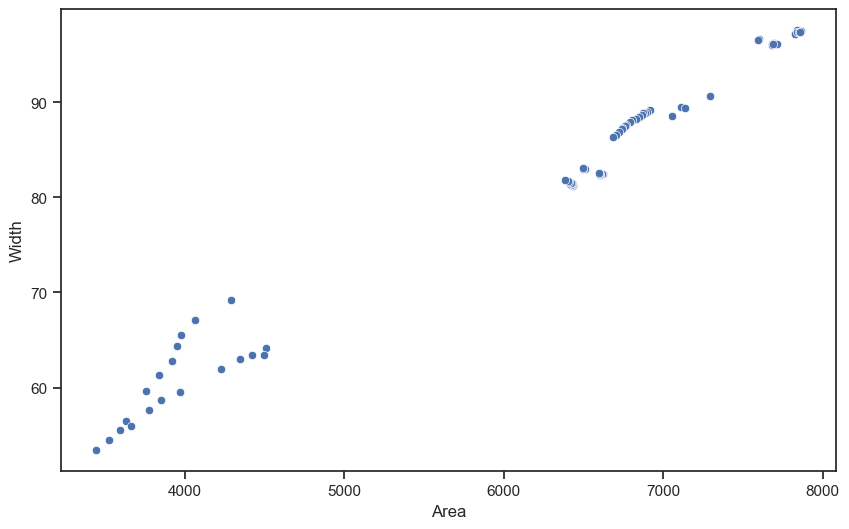

In [26]:
# See the relationship between the area and width since it has 0.99
plt.figure(figsize=(10,6))

sns.scatterplot(data=fruits, x='Area', y='Width')
plt.show()

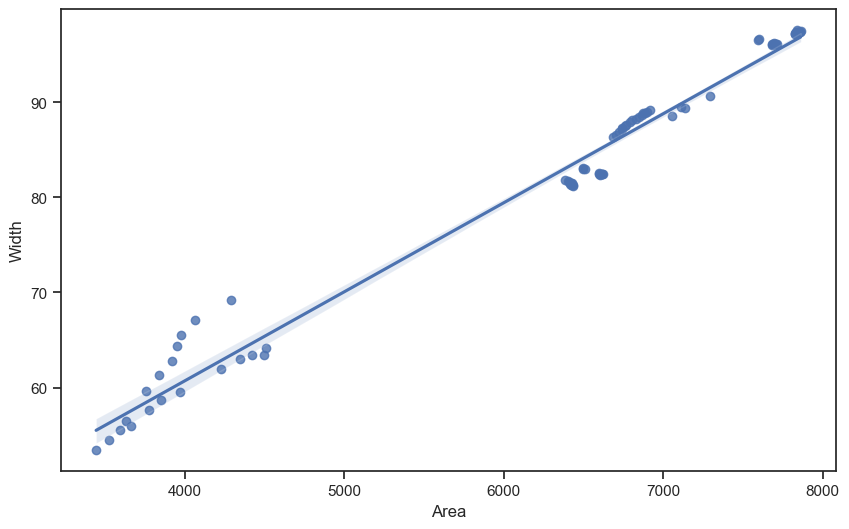

In [27]:
# exercise3: select any 2 features that may be linearly dependent and plot regplot
plt.figure(figsize=(10,6))
sns.regplot(data=fruits, x='Area', y='Width')
plt.show()

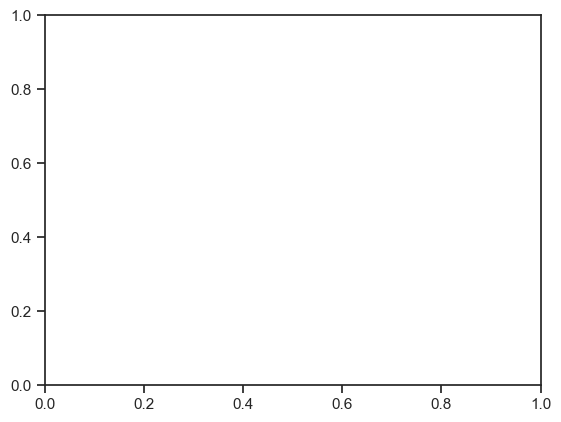

In [28]:
# see the relationship between Perimeter and Length for each target
# color = r,g,b,m

fig, ax = plt.subplots()



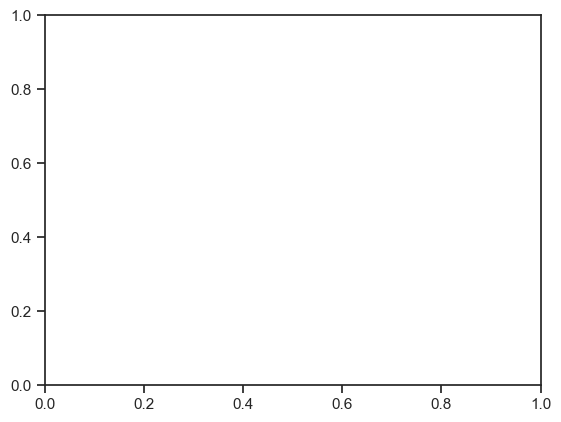

In [29]:
# see the relationship between Width and Length for each target
fig, ax = plt.subplots()

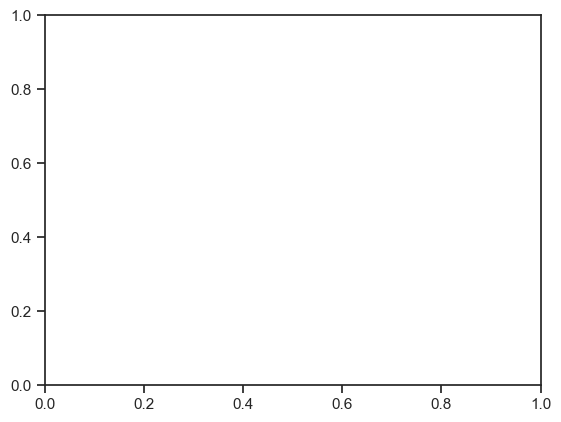

In [30]:
# Exercise: see the relationship between Roundness and Eccentricity for each target
fig, ax = plt.subplots()


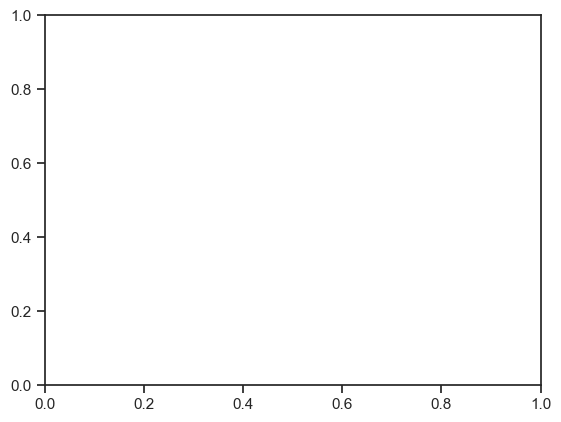

In [31]:
# Exercise: see the relationship between Area and "Average Color Red" for each target
fig, ax = plt.subplots()


In [32]:
# exercise4: choose other pair of feature and scatter plot them.

#### 1.2: Scale data

In [33]:
# Load library for scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()

In [34]:
# function to scale each column
def scaleColumns(df, cols_to_scale):
   pass

In [35]:
# scale data in each column
scaled_fruits = scaleColumns(fruits,features)

In [36]:
# see the data after scaled
scaled_fruits.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
# distribution after scaled
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 10))
index = 0
axs = axs.flatten()

# sns.distplot(fruits[k].values, bins=20, ax=axs[index])
#for k,v in scaled_fruits.items():
for k in features:
    scaled_fruits[k].hist(bins=20, ax=axs[index])
    axs[index].set_title(k)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

#### Dataset taken from `https://www.kaggle.com/datasets/harishkumardatalab/data-science-salary-2021-to-2023`

In [37]:
salary_data = pd.read_csv('data_science_salary_2021_2023.csv')

In [38]:
salary_data.shape

(3761, 9)

In [39]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [40]:
salary_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [41]:
salary_data['experience_level'].unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

In [42]:
salary_data['company_location'].unique()

array(['US', 'NG', 'IN', 'CA', 'ES', 'GH', 'DE', 'CH', 'AU', 'SE', 'BR',
       'GB', 'VN', 'BA', 'GR', 'HK', 'NL', 'FI', 'IE', 'SG', 'SI', 'MX',
       'FR', 'HR', 'AM', 'KE', 'RO', 'TH', 'CF', 'UA', 'IL', 'CO', 'PT',
       'EE', 'LV', 'MK', 'PK', 'IT', 'MA', 'AR', 'CR', 'IR', 'HU', 'AS',
       'BE', 'AT', 'ID', 'LU', 'MY', 'CZ', 'DZ', 'RU', 'PL', 'LT', 'TR',
       'BO', 'EG', 'AL', 'SK', 'PR', 'AE', 'DK', 'IQ', 'CN', 'BS', 'JP',
       'CL', 'MD', 'MT', 'PH', 'HN', 'NZ'], dtype=object)

In [43]:
salary_data['job_title'].value_counts()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  614
Machine Learning Engineer     291
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
BI Data Engineer                1
Deep Learning Researcher        1
Head of Machine Learning        1
Staff Data Analyst              1
Name: count, Length: 93, dtype: int64

In [44]:
salary_data['work_year'].unique()

array([2023, 2022, 2021, 2020], dtype=int64)

In [45]:
salary_data['job_title'].unique()

array(['Applied Scientist', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'BI Data Engineer', 'Research Engineer',
       'Business Data Analyst', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'AI Programmer',
       'AI Developer', 'Computer Vision Engineer', 'BI Developer',
       'Big Data Engineer', 'Deep Learning Engineer', 'Head of Data',
       'Analytics Engineer', 'Data Architect', 'Director of Data Science',
       'Head of Data Science', 'Data Analytics Manager', 'ML Engineer',
       'Applied Machine Learning Engineer', 'Applied Data Scientist',
       'ETL Engineer', 'Data Specialist', 'Lead Data Analyst',
       'Data Manager', 'Machine Learning Scientist', 'MLOps Engineer',
       'Financial Data Analyst', 'Software Data Engineer',
       'Data Science Manager', 'Data Science Consultant',
       'Machine Learning 

In [46]:
salary_data.salary

0       213660
1       130760
2       100000
3        30000
4       204620
         ...  
3756    130000
3757     80000
3758    190200
3759     40000
3760    412000
Name: salary, Length: 3761, dtype: int64

#### Salary vs Experience | Use proper visualization technique to show the relationship between salary vs experience (2 marks)

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\3867932903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')


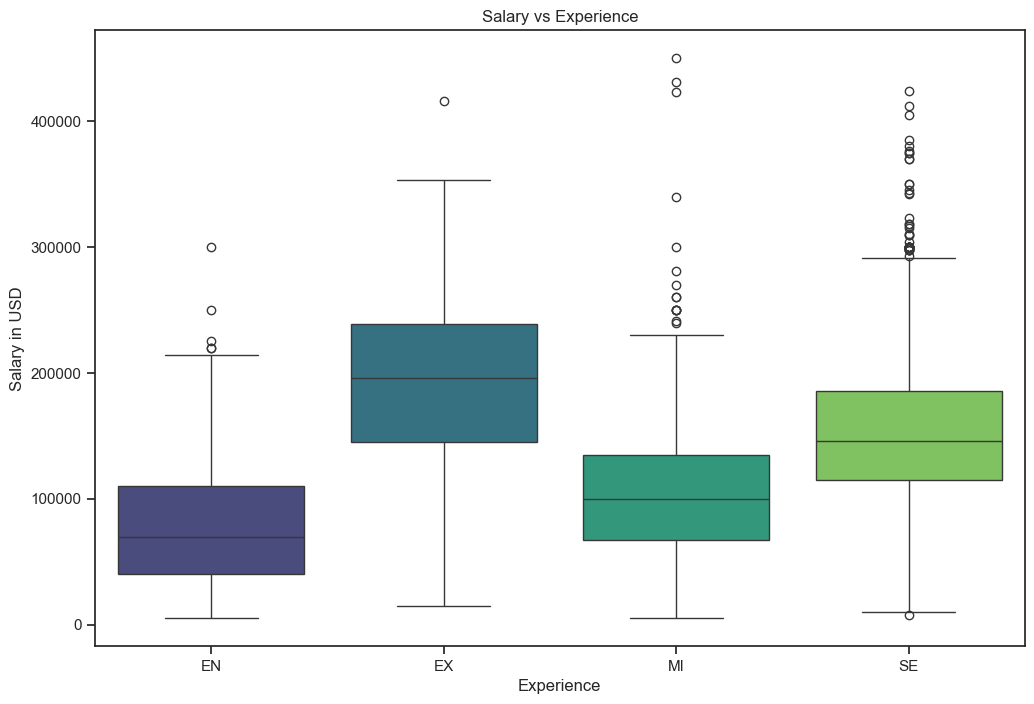

In [47]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary in USD')
plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\771222664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')


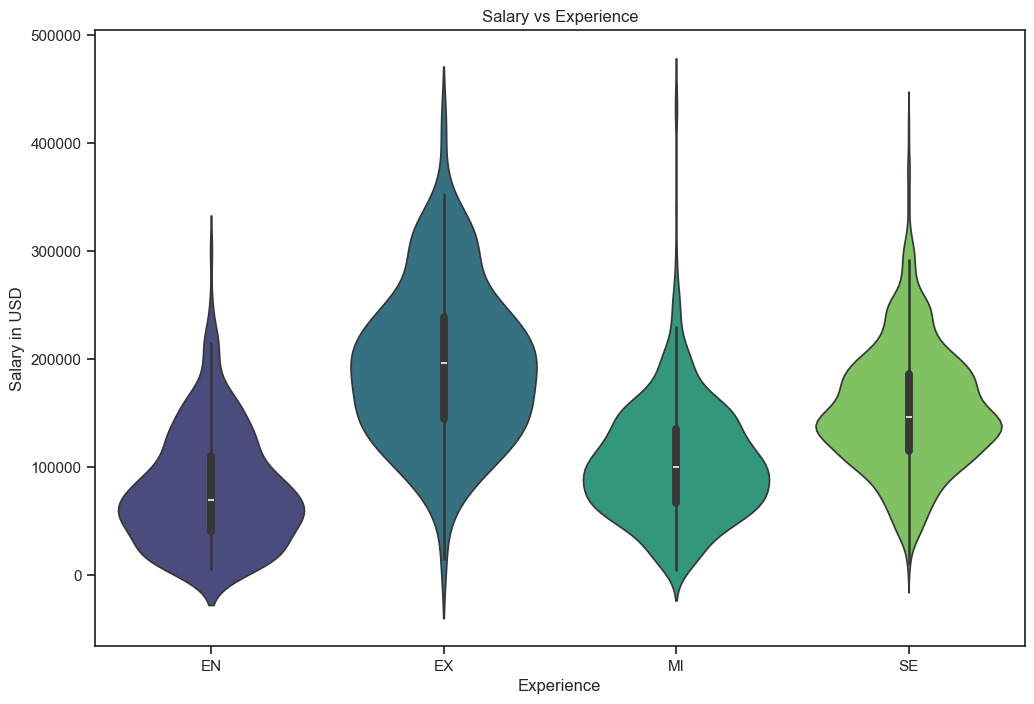

In [48]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary in USD')
plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\4071847894.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')


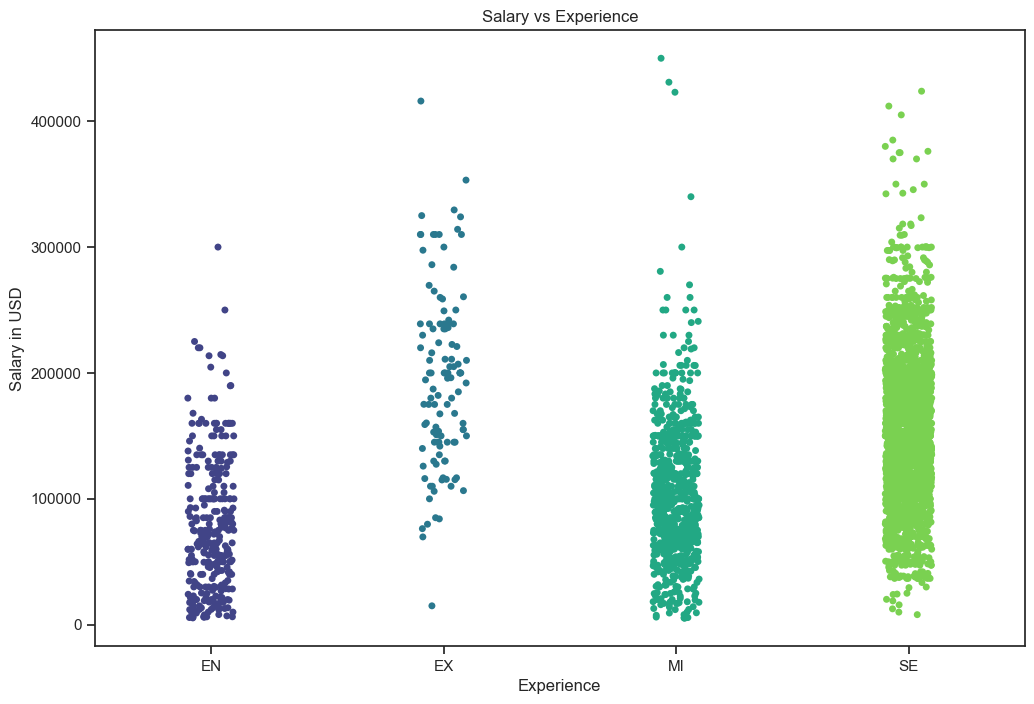

In [49]:
plt.figure(figsize=(12, 8))

# Plots individual data points for each category, showing the spread and clustering of values
sns.stripplot(x='experience_level', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary in USD')
plt.show()

#### Salary vs employment_type | Use proper visualization technique to show the relationship between salary vs employment_type (2 marks)

In [50]:
salary_data.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\3496671623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')


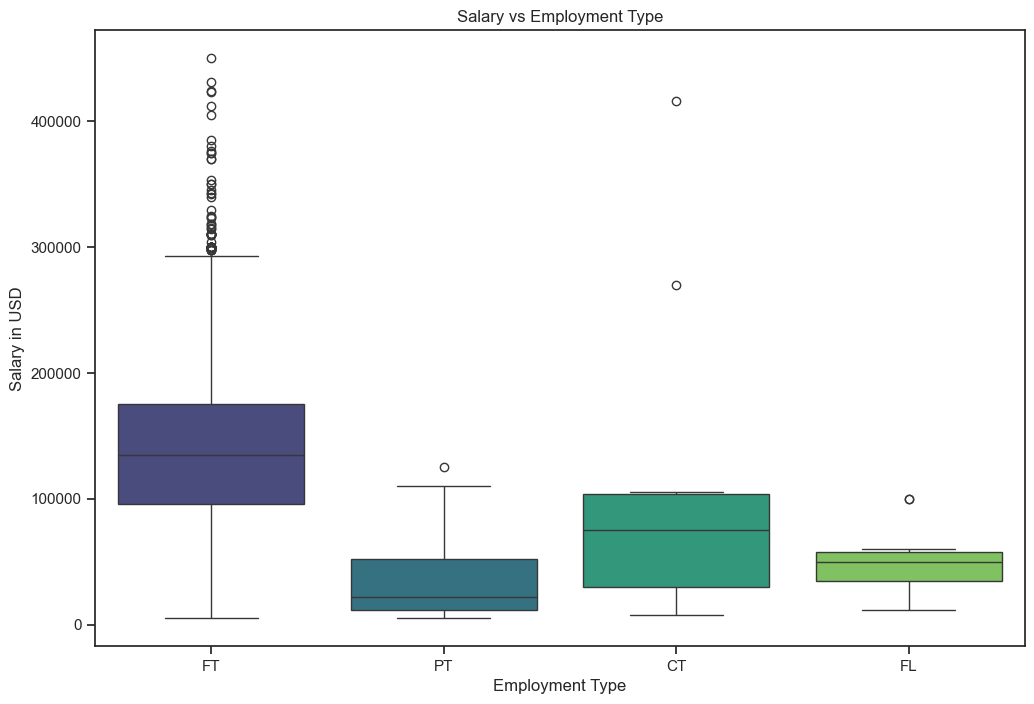

In [51]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title("Salary vs Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\1881712386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')


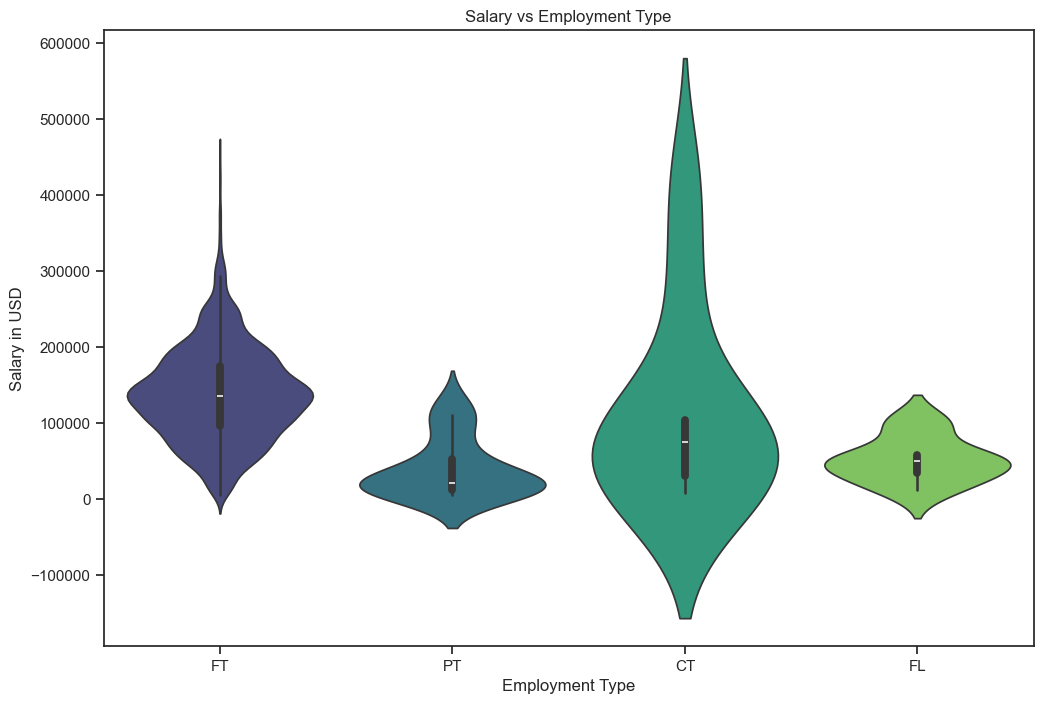

In [52]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title("Salary vs Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\3358226939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')


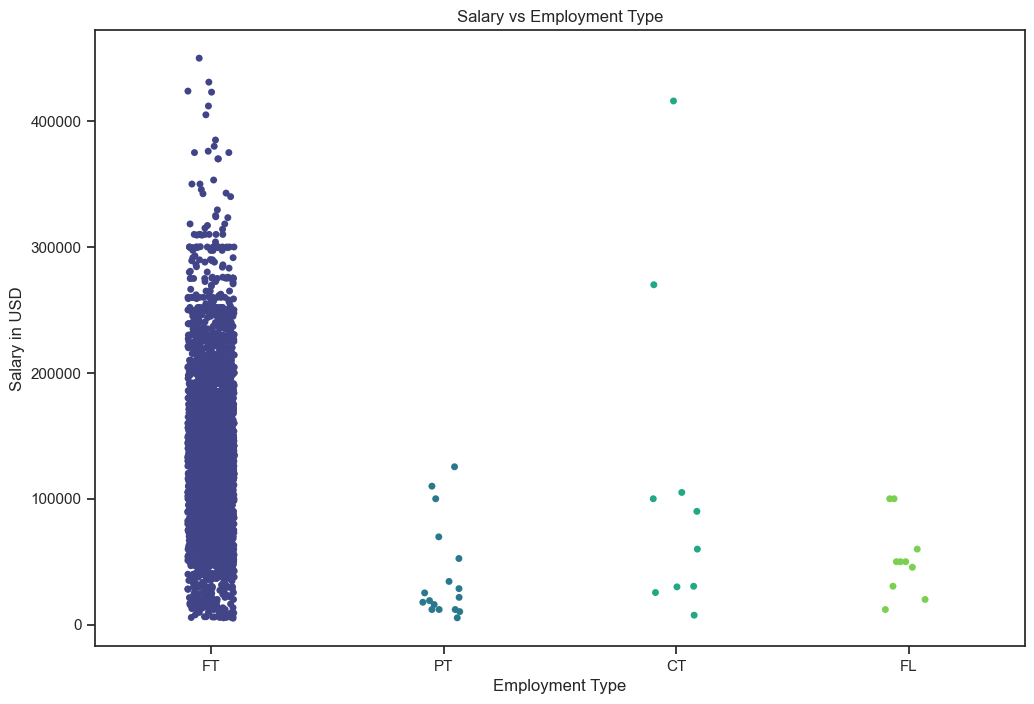

In [53]:
plt.figure(figsize=(12, 8))

sns.stripplot(x='employment_type', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title("Salary vs Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary in USD")

plt.show()

#### Salary vs company_size | Use proper visualization technique to show the relationship between salary vs company_size (2 marks)

In [54]:
salary_data.company_size.unique()

array(['L', 'M', 'S'], dtype=object)

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\879199461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')


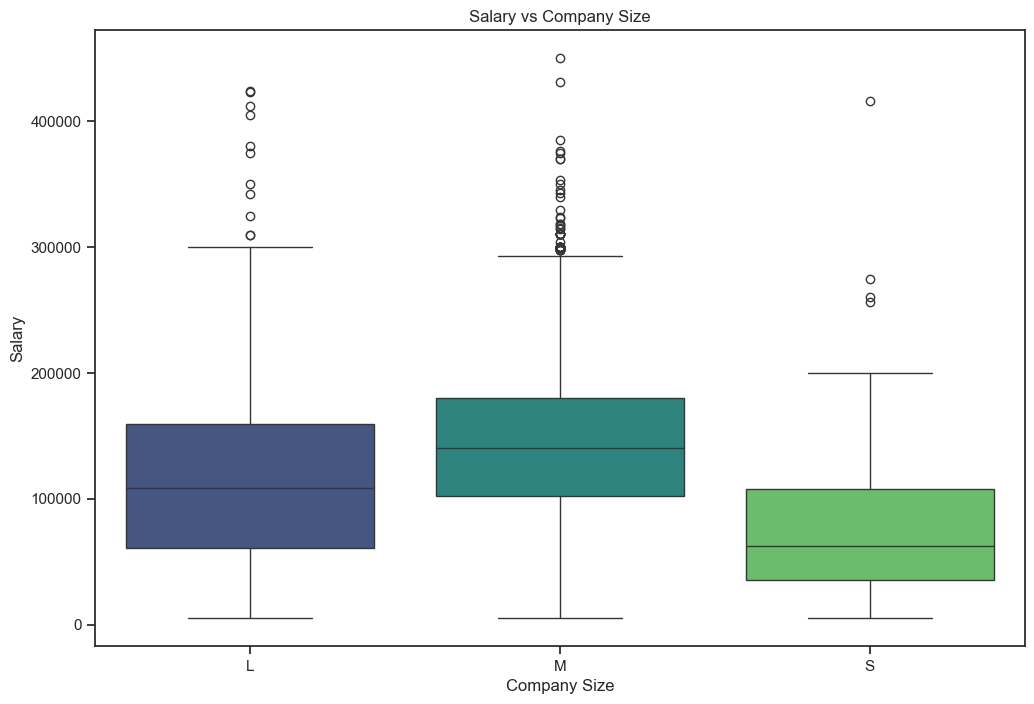

In [55]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')

plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\3889054652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')


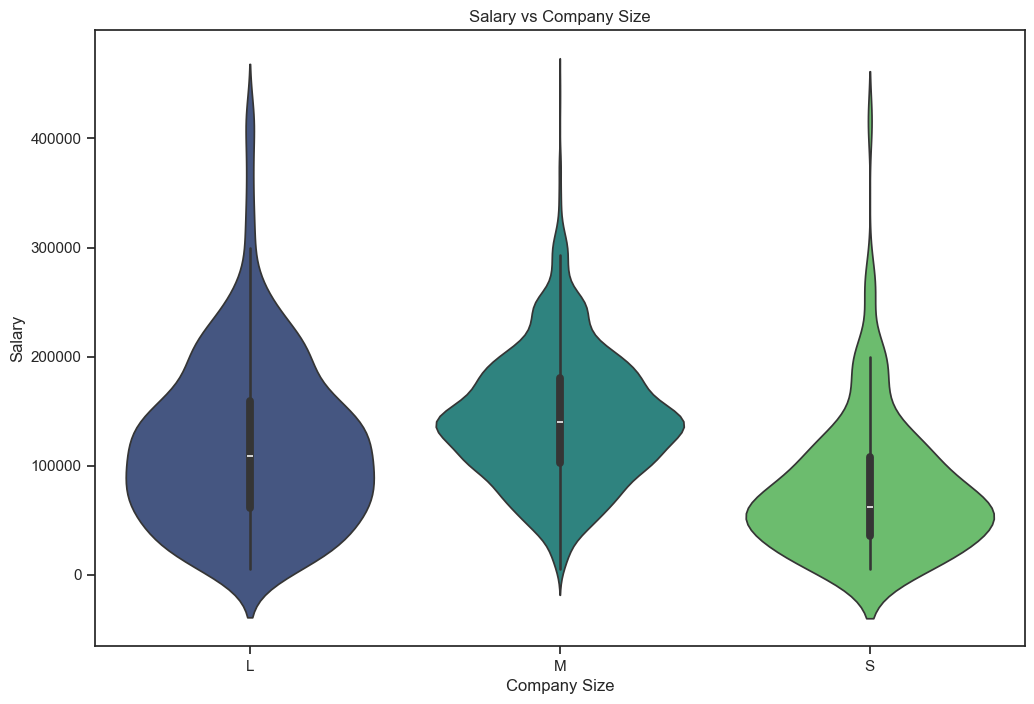

In [56]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')

plt.show()

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2185805539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')


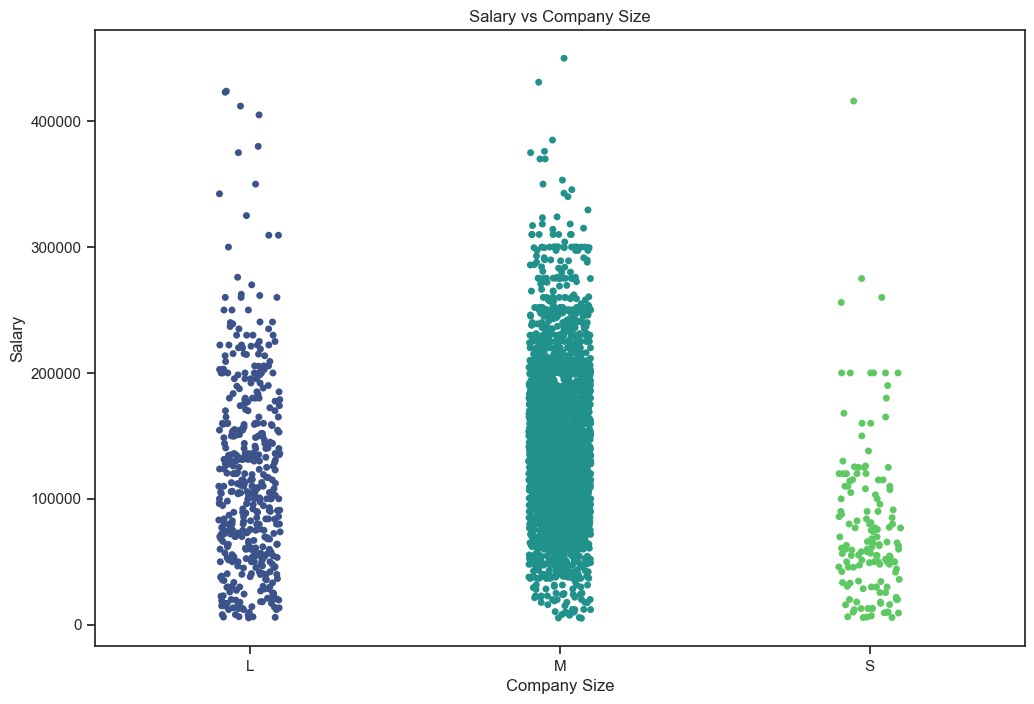

In [57]:
plt.figure(figsize=(12, 8))

sns.stripplot(x='company_size', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title('Salary vs Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')

plt.show()

#### Salary vs Location | Get average salary for all the location and write out the top 3 and botton 3 location according to salaries (5 marks)

In [58]:
salary_per_loc = salary_data.groupby('company_location').salary_in_usd.mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
top_3_locations = salary_per_loc.head(3)
bottom_3_locations = salary_per_loc.tail(3)

top_3_locations, bottom_3_locations

(   company_location  salary_in_usd
 37               IL  271446.500000
 59               PR  167500.000000
 70               US  151801.053859,
    company_location  salary_in_usd
 47               MA        10000.0
 9                BO         7500.0
 49               MK         6304.0)

C:\Users\eraco\AppData\Local\Temp\ipykernel_19828\2941615401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_location', y='salary_in_usd', data=salary_data, palette='viridis')


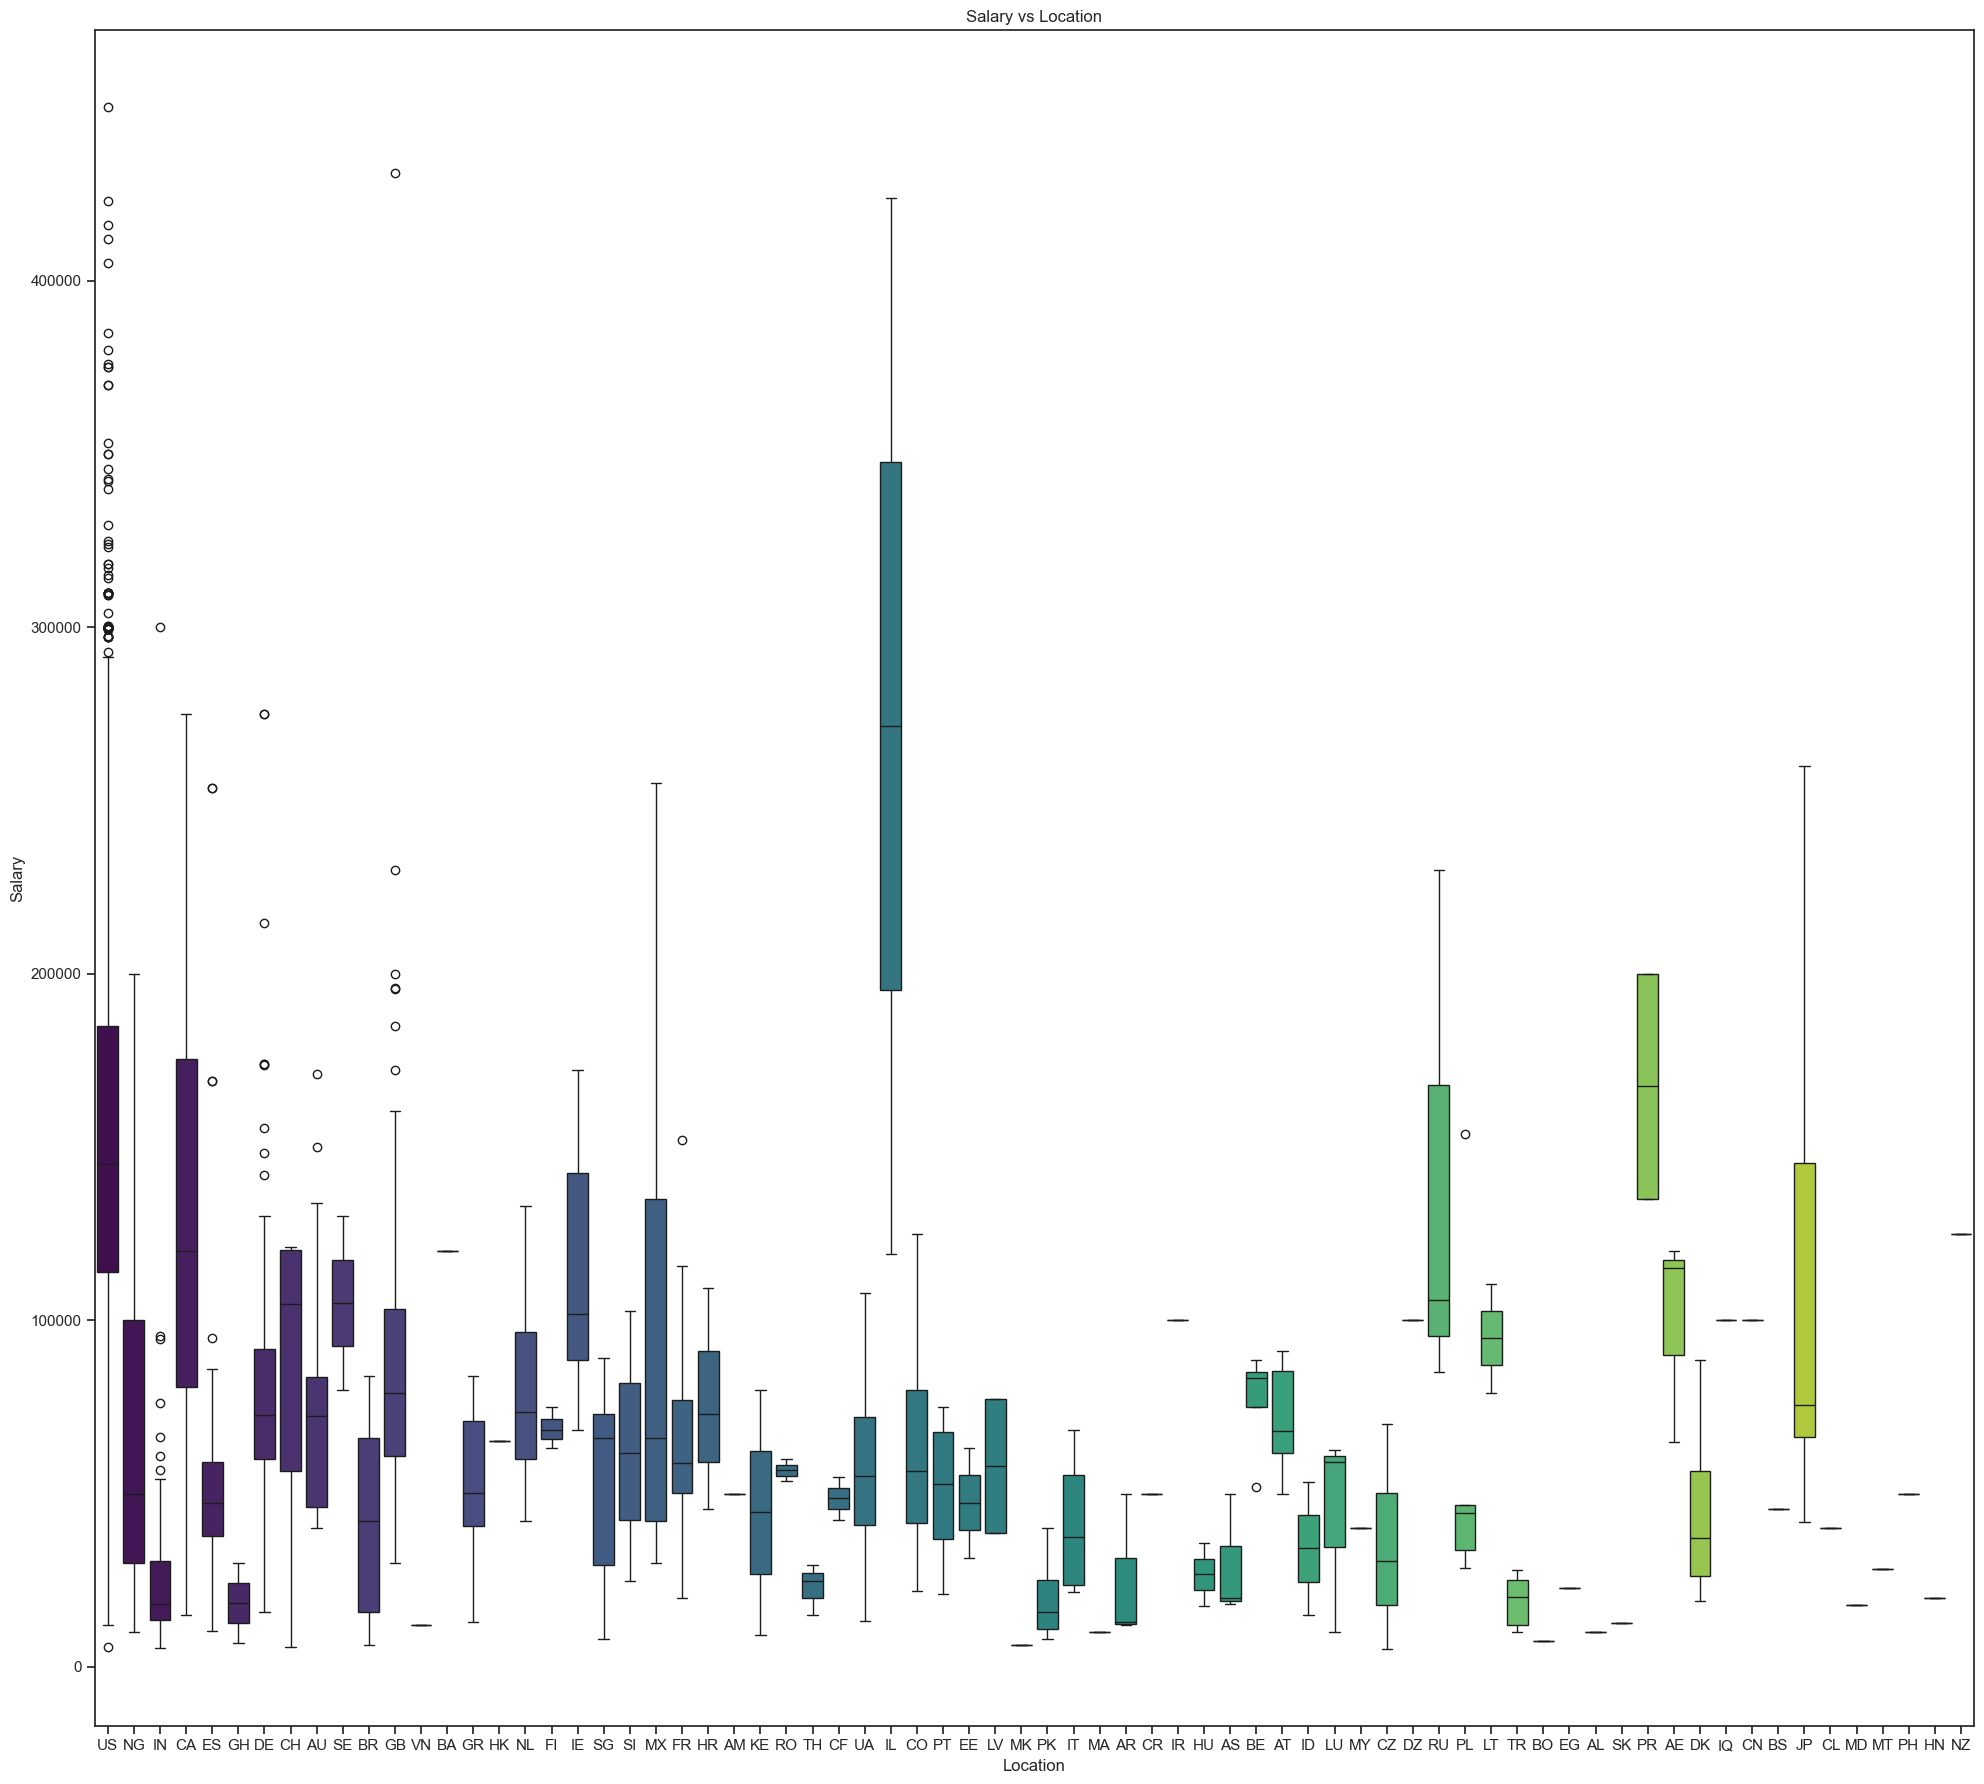

In [59]:
plt.figure(figsize=(20, 18))

sns.boxplot(x='company_location', y='salary_in_usd', data=salary_data, palette='viridis')

plt.title("Salary vs Location")
plt.xlabel("Location")
plt.ylabel("Salary")

plt.tight_layout()

#### Plot average salaries over the year(line chart). What is the trend of salaries/Is it increasing or decreasing? Explain. (5 marks)

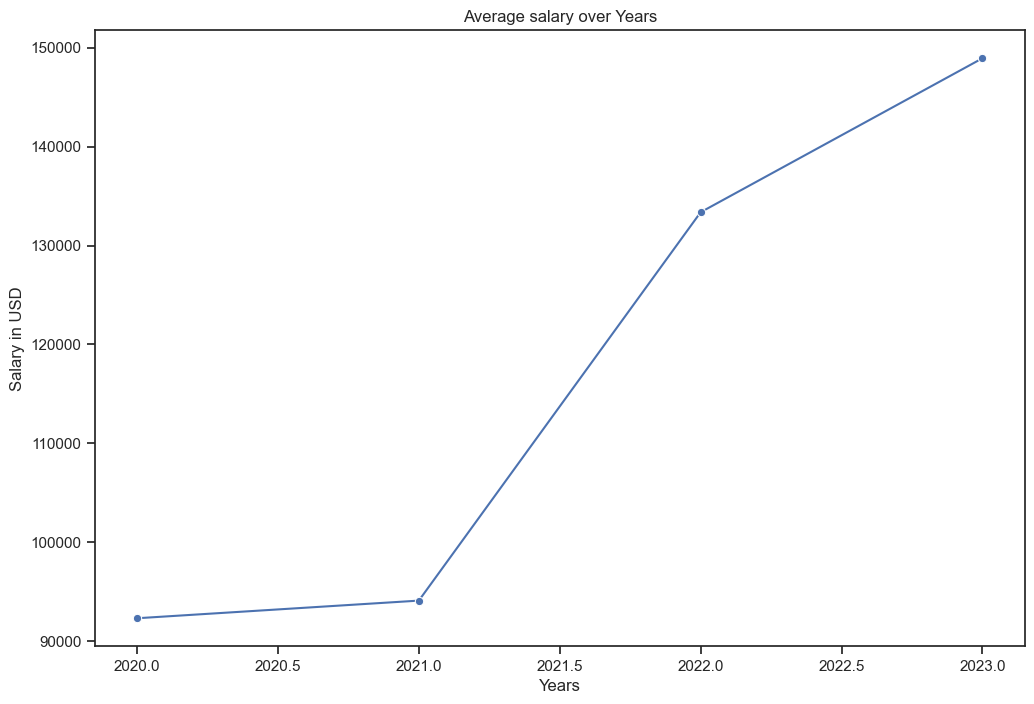

In [60]:
avg_salary_year = salary_data.groupby('work_year').salary_in_usd.mean().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(x='work_year', y='salary_in_usd', data=avg_salary_year, marker='o', color='b')

plt.title("Average salary over Years")
plt.xlabel("Years")
plt.ylabel("Salary in USD")

plt.show()

It is clear that the salary is increasing over the years worker work in the same job. It is natural - the more experience you have, the more you competitive in the market, the more your salary.

#### Count values for each job title. Select the jobs that have less than 50 entries. Replace those values with `Others`. Create a pie chart. (10 marks)

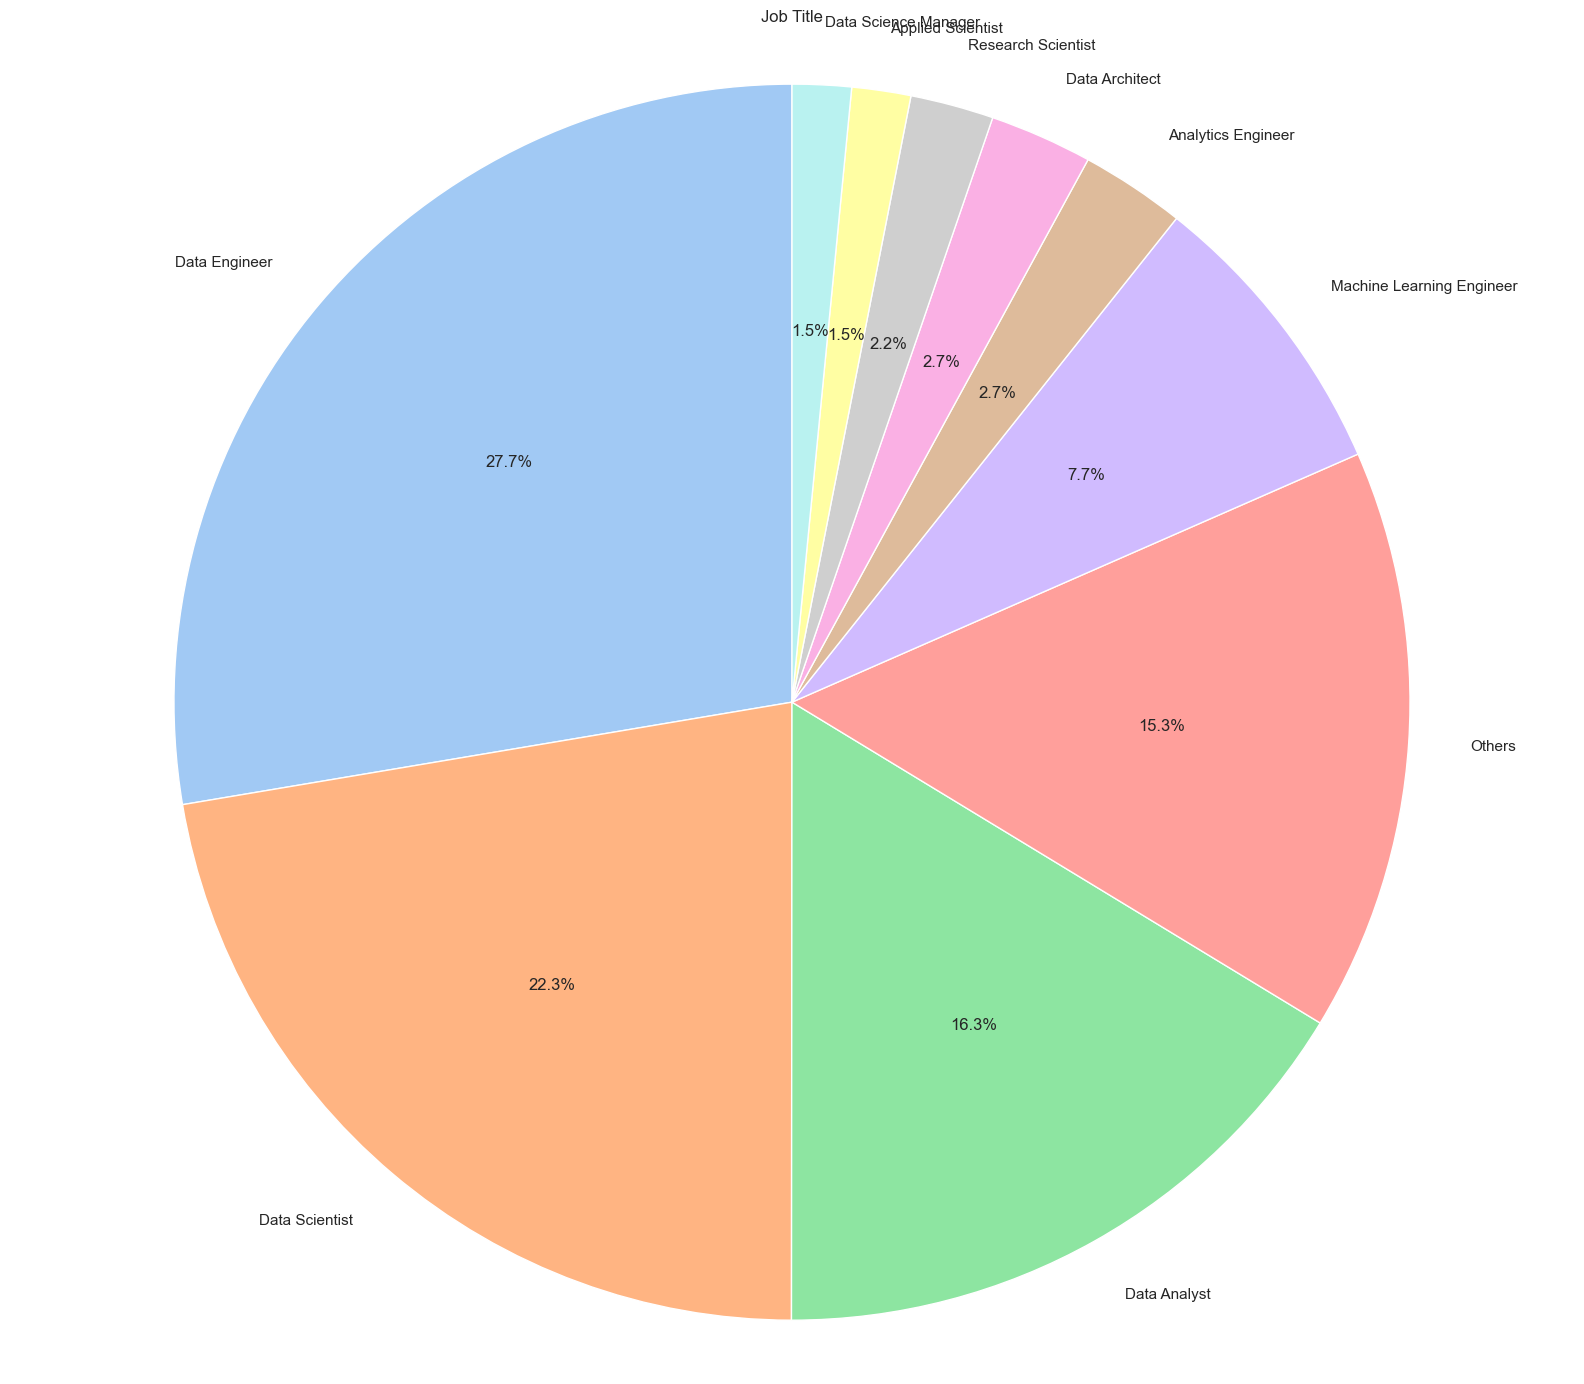

In [62]:
job_counts = salary_data['job_title'].value_counts()

salary_data['job_title'] = salary_data['job_title'].apply(lambda x: x if job_counts[x] >= 50 else 'Others')

updated_job_counts = salary_data['job_title'].value_counts()

plt.figure(figsize=(16, 14))
plt.pie(updated_job_counts, labels=updated_job_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Job Title')
plt.axis('equal')

plt.tight_layout()

In [64]:
salary_data.shape

(3761, 9)

In [65]:
3761//800

4